## Dataset loading


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import json
import matplotlib.pyplot as plt


In [60]:
# Spécifiez le chemin complet vers le fichier JSON dans le dossier partagé
file_path = '/content/drive/Shared drives/PFA/preprocessed_dataset.json'

# Charger le fichier JSON
with open(file_path, 'r') as file:
    data = json.load(file)

In [62]:
df = pd.DataFrame(data)
df

,username,user_id,followers_count,posts_count,posts,interests
0,Cristiano Ronaldo,17841401692602711,628547369,3666,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...","{'Business and Industry': ['social media', 'Bu..."
1,Kim Kardashian,17841401819740287,363764061,6169,"[{'media_type': 'IMAGE', 'media_url': 'https:/...","{'Business and Industry': ['social media', 'Bu..."
2,𝐃𝐫. 𝐌𝐢𝐤𝐞 𝐕𝐚𝐫𝐬𝐡𝐚𝐯𝐬𝐤𝐢,17841400513960353,4468310,902,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...","{'Business and Industry': ['social media', 'He..."
3,Tyler “Ninja” Blevins,17841402089909710,12414555,1994,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...","{'Business and Industry': ['social media'], 'E..."
4,American Heart Association,17841401133162924,428520,3926,"[{'media_type': 'IMAGE', 'media_url': 'https:/...","{'Business and Industry': ['social media', 'He..."
...,...,...,...,...,...,...
879,Marques Brownlee,17841400463380452,4857378,1974,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']}
880,iPhone Photography School,17841400070170876,3785467,3052,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...",{'Technology': ['consumer electronics']}
881,Beebom,17841403462026706,3160479,1039,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']}
882,Lewis Hilsenteger,17841401804410477,2860974,3598,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']}


##Dataset Analysis

In [ ]:
shape=df.shape

print("Number of instances ", shape[0])
print("Number of attributes ", shape[1])
print("\nList of attributes ", df.columns.tolist())



Number of instances  884
Number of attributes  6

List of attributes  ['username', 'user_id', 'followers_count', 'posts_count', 'posts', 'interests']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   username         884 non-null    object
 1   user_id          884 non-null    object
 2   followers_count  884 non-null    int64 
 3   posts_count      884 non-null    int64 
 4   posts            884 non-null    object
 5   interests        884 non-null    object
dtypes: int64(2), object(4)
memory usage: 41.6+ KB


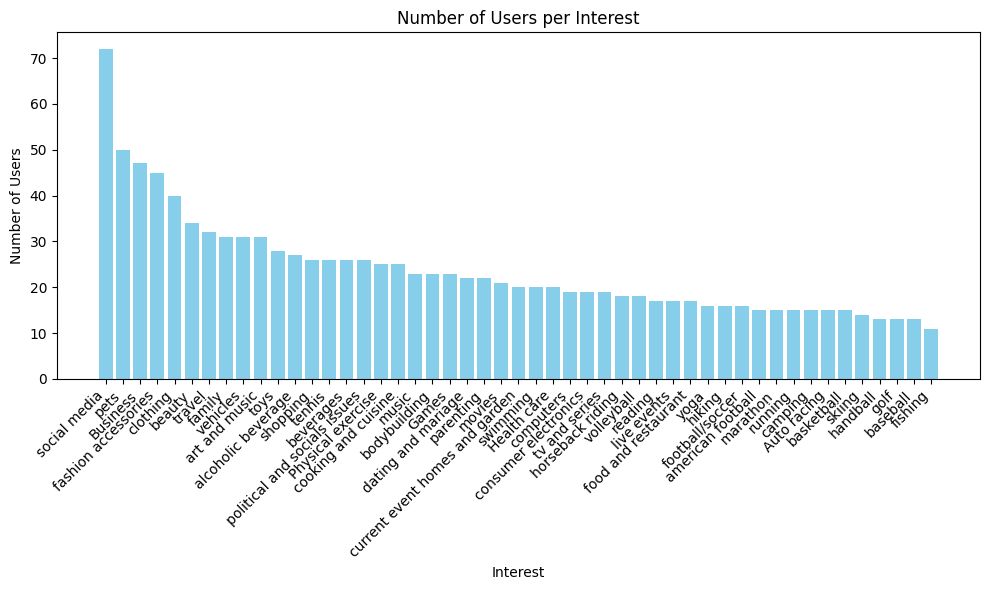

In [ ]:
all_interests = []

for interests in df['interests']:
    for category, interest_list in interests.items():
        all_interests.extend(interest_list)
interest_counts = Counter(all_interests)

# Convertir le résultat en DataFrame pour une meilleure lisibilité
interest_counts_df = pd.DataFrame(interest_counts.items(), columns=['Interest', 'Count'])
interest_counts_df = interest_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(interest_counts_df['Interest'], interest_counts_df['Count'], color='skyblue')
plt.xlabel('Interest')
plt.ylabel('Number of Users')
plt.title('Number of Users per Interest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
posts_user1 = df['posts'][0]
posts_user1

[{'media_type': 'CAROUSEL_ALBUM',
  'media_url': 'https://scontent.cdninstagram.com/v/t39.30808-6/438789641_1066209594865580_1487831106876344537_n.jpg?_nc_cat=1&ccb=1-7&_nc_sid=18de74&_nc_ohc=aOM2UcupUA0Ab5dQA7U&_nc_ht=scontent.cdninstagram.com&edm=AL-3X8kEAAAA&oh=00_AfCwE-xTBOHLJQttq7uexzVSgKNBBniuiTjcLJ79tufyYw&oe=662F1836',
  'timestamp': '2024-04-24T15:13:22+0000',
  'caption': 'beam face smile',
  'comments_count': 24410,
  'like_count': 2292096,
  'id': '17993159861440009'},
 {'media_type': 'CAROUSEL_ALBUM',
  'media_url': 'https://scontent.cdninstagram.com/v/t39.30808-6/438109332_18547872565056421_1580250296434687002_n.jpg?_nc_cat=1&ccb=1-7&_nc_sid=18de74&_nc_ohc=PXWmYENuYRoAb5LsfFE&_nc_ht=scontent.cdninstagram.com&edm=AL-3X8kEAAAA&oh=00_AfD5Y5DyBbNkdI9sK1FyDNPOcGGPGWdC8vj9XnjfGVqJJA&oe=662F3F74',
  'timestamp': '2024-04-22T16:30:04+0000',
  'caption': 'happi red heart',
  'comments_count': 78312,
  'like_count': 13340526,
  'id': '17900083259972734'},
 {'media_type': 'IMAGE',
 

In [ ]:
interests_user1 = df['interests'][0]
interests_user1

{'Business and Industry': ['social media', 'Business'],
 'family and relationships': ['family', 'parenting'],
 'fitness and wellness': ['Physical exercise'],
 'shopping and fashion': ['clothing', 'fashion accessories'],
 'sports': ['football/soccer']}

In [63]:
def extract_interests(row):
    interests = row['interests']
    interest_text = []
    for category, subcategories in interests.items():
        interest_text.extend(subcategories)
    return ' '.join(interest_text)

df['interests_text'] = df.apply(extract_interests, axis=1)
df

,username,user_id,followers_count,posts_count,posts,interests,interests_text
0,Cristiano Ronaldo,17841401692602711,628547369,3666,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...","{'Business and Industry': ['social media', 'Bu...",social media Business family parenting Physica...
1,Kim Kardashian,17841401819740287,363764061,6169,"[{'media_type': 'IMAGE', 'media_url': 'https:/...","{'Business and Industry': ['social media', 'Bu...",social media Business beauty clothing fashion ...
2,𝐃𝐫. 𝐌𝐢𝐤𝐞 𝐕𝐚𝐫𝐬𝐡𝐚𝐯𝐬𝐤𝐢,17841400513960353,4468310,902,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...","{'Business and Industry': ['social media', 'He...",social media Health care
3,Tyler “Ninja” Blevins,17841402089909710,12414555,1994,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...","{'Business and Industry': ['social media'], 'E...",social media Games
4,American Heart Association,17841401133162924,428520,3926,"[{'media_type': 'IMAGE', 'media_url': 'https:/...","{'Business and Industry': ['social media', 'He...",social media Health care
...,...,...,...,...,...,...,...
879,Marques Brownlee,17841400463380452,4857378,1974,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']},consumer electronics
880,iPhone Photography School,17841400070170876,3785467,3052,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...",{'Technology': ['consumer electronics']},consumer electronics
881,Beebom,17841403462026706,3160479,1039,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']},consumer electronics
882,Lewis Hilsenteger,17841401804410477,2860974,3598,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']},consumer electronics


#Creating a TF-IDF Matrix for the interests_text Field

**Objective**: Capture the importance of terms within user interests.

**Method**: Use TfidfVectorizer to create a matrix that represents the importance of words in each user's interests text.

**Normalization**: StandardScaler is used to normalize the TF-IDF vectors to ensure they have a comparable scale to the Word2Vec vectors.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

In [ ]:
# Remplir les valeurs manquantes avec une chaîne vide
df['interests_text'] = df['interests_text'].fillna('')

# Définir un objet TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Construire la matrice TF-IDF en ajustant et en transformant les données
tfidf_matrix = tfidf.fit_transform(df['interests_text'])

# Normaliser les vecteurs TF-IDF
tfidf_matrix_normalized = StandardScaler().fit_transform(tfidf_matrix.toarray())



#Creating Word2Vec Vectors for Captions in the Posts Attribute

**Objective**: Capture semantic meaning from user captions.

**Method**: Load a pre-trained Word2Vec model (GoogleNews-vectors-negative300) to generate word vectors.

**Vector Extraction**: For each user's captions, compute the mean vector by averaging the vectors of words found in the Word2Vec model.



In [ ]:
# Fonction pour creer les légendes des publications pour chaque utilisateur
def create_captions_text(row):
    # Concaténer les légendes des publications
    captions_text = ' '.join(post['caption'] for post in row['posts'] if 'caption' in post )


    return captions_text# Fonction pour creer les légendes des publications pour chaque utilisateur
def create_captions_text(row):
    # Concaténer les légendes des publications
    captions_text = ' '.join(post['caption'] for post in row['posts'] if 'caption' in post )


    return captions_text


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!kaggle datasets download -d leadbest/googlenewsvectorsnegative300

Dataset URL: https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300
License(s): other
100% 3.17G/3.17G [00:48<00:00, 103MB/s] 
100% 3.17G/3.17G [00:49<00:00, 69.5MB/s]


In [ ]:
!unzip googlenewsvectorsnegative300.zip

Archive:  googlenewsvectorsnegative300.zip
  inflating: GoogleNews-vectors-negative300.bin  
  inflating: GoogleNews-vectors-negative300.bin.gz  


In [ ]:
!ls

drive				    GoogleNews-vectors-negative300.bin.gz  sample_data
GoogleNews-vectors-negative300.bin  googlenewsvectorsnegative300.zip


In [ ]:
from gensim.models import KeyedVectors
#word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [ ]:
def get_word2vec_vector(text, model):
    words = text.split()
    word_vectors = [model[word] for word in words if word in model]
    if not word_vectors:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

In [ ]:
import numpy as np
df['caption_vector'] =  df.apply(create_captions_text, axis=1).apply(lambda x: get_word2vec_vector(x, word2vec_model))
caption_vectors = np.vstack(df['caption_vector'].values)


#Calculating Cosine Similarity of Combined Vectors

**Objective**: Measure the similarity between users based on combined interests and captions.

**Method**: Use cosine_similarity to compute similarity scores between the combined vectors of all users.

In [ ]:
# Combiner les vecteurs
combined_vectors = np.hstack((tfidf_matrix_normalized, np.vstack(df['caption_vector'].values)))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculer la matrice de similarité cosinus sur les vecteurs combinés
combined_similarity_matrix = cosine_similarity(combined_vectors)


In [ ]:
combined_similarity_matrix

array([[ 1.        ,  0.42540611,  0.07530726, ..., -0.06137122,
        -0.06169973, -0.06038456],
       [ 0.42540611,  1.        ,  0.20052589, ..., -0.05861816,
        -0.05906033, -0.05759797],
       [ 0.07530726,  0.20052589,  1.        , ..., -0.03581258,
        -0.03606369, -0.03503898],
       ...,
       [-0.06137122, -0.05861816, -0.03581258, ...,  1.        ,
         0.99824422,  0.9961462 ],
       [-0.06169973, -0.05906033, -0.03606369, ...,  0.99824422,
         1.        ,  0.99728634],
       [-0.06038456, -0.05759797, -0.03503898, ...,  0.9961462 ,
         0.99728634,  1.        ]])

#Getting the most similar users to a given user

**Functionality**: Identify and recommend users similar to a given user.

**Process**:

1. Identify the given user's index based on their username.

2. Compute similarity scores between the given user and all other users.

3. Exclude the given user from the list of recommendations.

4. Sort the users based on similarity scores and select the top 10 similar users.

5. Retrieve and display the interests of the recommended users.

In [ ]:
def get_most_similar_users(username, similarity_matrix, df):
    # Obtenez l'index de l'utilisateur en fonction du nom d'utilisateur
    user_index = df[df['username'] == username].index[0]

    # Récupérez les scores de similarité de l'utilisateur avec tous les autres utilisateurs
    user_similarity_scores = similarity_matrix[user_index]

    # Triez les utilisateurs en fonction de leur similarité (du plus similaire au moins similaire)
    similar_users_indices = sorted(range(len(user_similarity_scores)), key=lambda i: user_similarity_scores[i], reverse=True)

    # Excluez l'utilisateur lui-même de la liste des recommandations
    similar_users_indices = [idx for idx in similar_users_indices if idx != user_index]

    # Récupérez les noms des 10 utilisateurs les plus similaires
    top_similar_users = df.loc[similar_users_indices[:10], 'username'].tolist()

    # Récupérez les intérêts des utilisateurs recommandés
    recommended_users_interests = []
    for user in top_similar_users:
        interests = df[df['username'] == user]['interests'].values[0]
        recommended_users_interests.append(interests)

    return top_similar_users, recommended_users_interests

In [ ]:
# Utilisation de la fonction get_most_similar_users pour obtenir les utilisateurs similaires et leurs intérêts
similar_users, recommended_users_interests = get_most_similar_users('Cristiano Ronaldo', combined_similarity_matrix, df)

print("Utilisateur :", 'Cristiano Ronaldo' )
interests_user = df[df['username'] == 'Cristiano Ronaldo']['interests'].values[0]
print("interets : ",interests_user)
print()

print("Utilisateurs similaires :")
for user, interests in zip(similar_users, recommended_users_interests):
    print(f"Utilisateur : {user}")
    print("Intérêts :")
    for category, subcategories in interests.items():
        print(f"- {category}: {', '.join(subcategories)}")
    print()

Utilisateur : Cristiano Ronaldo
interets :  {'Business and Industry': ['social media', 'Business'], 'family and relationships': ['family', 'parenting'], 'fitness and wellness': ['Physical exercise'], 'shopping and fashion': ['clothing', 'fashion accessories'], 'sports': ['football/soccer']}

Utilisateurs similaires :
Utilisateur : Rúben Gato Dias 🇵🇹
Intérêts :
- fitness and wellness: Physical exercise
- sports: football/soccer
- Business and Industry: social media

Utilisateur : Jack Grealish
Intérêts :
- fitness and wellness: Physical exercise
- sports: football/soccer
- Business and Industry: social media

Utilisateur : David Beckham
Intérêts :
- Business and Industry: social media, Business
- family and relationships: family, dating and mariage
- fitness and wellness: Physical exercise
- shopping and fashion: beauty, clothing
- sports: football/soccer

Utilisateur : Álvaro Morata
Intérêts :
- family and relationships: family, dating and mariage
- fitness and wellness: Physical exe

La première méthode utilise CountVectorizer pour créer des vecteurs binaires basés sur la présence ou l'absence de sous-catégories d'intérêts, tandis que la deuxième méthode utilise TfidfVectorizer pour créer une représentation pondérée des termes d'intérêts.

La similarité cosinus est calculée différemment dans les deux méthodes en raison de la nature des vecteurs d'intérêts utilisés (binaires vs pondérés).

# Clustering with CAH

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Number of Clusters : 2, Silhouette Score : 0.2927810725265828
Number of Clusters : 3, Silhouette Score : 0.2142044190796251
Number of Clusters : 4, Silhouette Score : 0.23636603541685547
Number of Clusters : 5, Silhouette Score : 0.2407040794488928
Number of Clusters : 6, Silhouette Score : 0.2684276718419247
Number of Clusters : 7, Silhouette Score : 0.29504874990696145
Number of Clusters : 8, Silhouette Score : 0.25572885860280237
Number of Clusters : 9, Silhouette Score : 0.2827067402015249
Number of Clusters : 10, Silhouette Score : 0.3077061977015919
Number of Clusters : 11, Silhouette Score : 0.3332535514306715
Number of Clusters : 12, Silhouette Score : 0.35656769154281187
Number of Clusters : 13, Silhouette Score : 0.3729038140070303
Number of Clusters : 14, Silhouette Score : 0.39052028517369847
Number of Clusters : 15, Silhouette Score : 0.4117100891006259
Number of Clusters : 16, Silhouette Score : 0.4138372145895472
Number of Clusters : 17, Silhouette Score : 0.433795236445

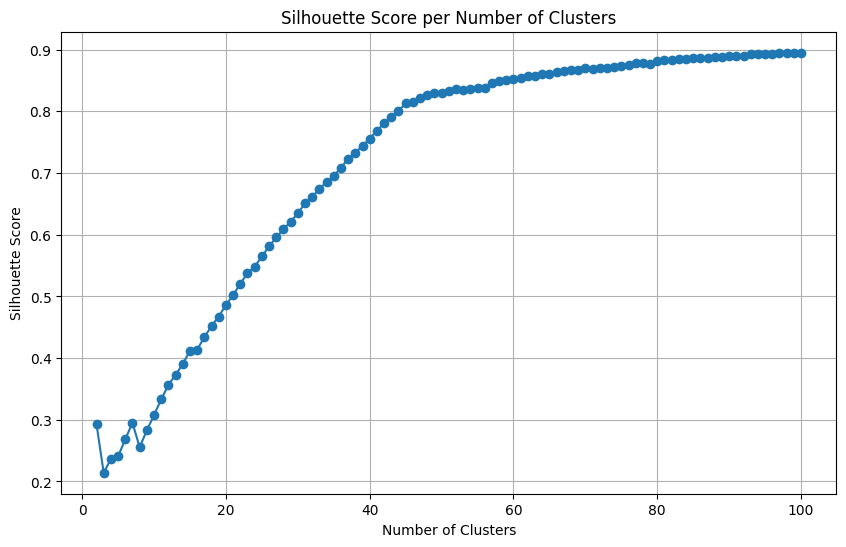

In [ ]:
# Fonction pour évaluer le score de silhouette pour différents nombres de clusters
def evaluate_silhouette(similarity_matrix, max_clusters):
    distance_matrix = 1 - similarity_matrix
    Z = linkage(distance_matrix, method='ward')
    silhouette_scores = []

    for n_clusters in range(2, max_clusters + 1):
        cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
        silhouette_avg = silhouette_score(distance_matrix, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"Number of Clusters : {n_clusters}, Silhouette Score : {silhouette_avg}")

    return silhouette_scores

# Appliquer l'évaluation du score de silhouette
max_clusters = 100  # Spécifiez le nombre maximal de clusters à tester
silhouette_scores = evaluate_silhouette(combined_similarity_matrix, max_clusters)

# Tracer la courbe de silhouette
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score per Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Fonction pour le clustering hiérarchique
def hierarchical_clustering(similarity_matrix, n_clusters):
    # Convertir la matrice de similarité en une matrice de distance
    distance_matrix = 1 - similarity_matrix

    # Appliquer le clustering hiérarchique
    Z = linkage(distance_matrix, method='ward')  # Vous pouvez changer la méthode selon vos besoins

    # Découper les dendrogrammes pour obtenir les clusters
    cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')

    # Calculer le score de silhouette
    silhouette_avg = silhouette_score(distance_matrix, cluster_labels)
    print("Silhouette Score:", silhouette_avg)

    # Ajouter les étiquettes de cluster au DataFrame
    df['cluster'] = cluster_labels

    # Afficher les utilisateurs regroupés par cluster
    for cluster_id in range(1, n_clusters + 1):
        print(f"Cluster {cluster_id}:")
        cluster_users = df[df['cluster'] == cluster_id]['username'].tolist()
        print(cluster_users)
        print()

    # Compter le nombre d'utilisateurs dans chaque cluster
    cluster_counts = df['cluster'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
    plt.title('Number of Users per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Users')
    plt.show()

    # Visualiser le dendrogramme
    plt.figure(figsize=(25, 10))
    dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
    plt.title('Hierarchical Dendrogram')
    plt.xlabel('Index of Data Points')
    plt.ylabel('Distance')
    plt.show()

    return cluster_labels



Silhouette Score: 0.7526148138603429
Cluster 1:
['Better Homes & Gardens', 'This Old House', 'The Happy Gardening Life™ 🌞', 'IKEA USA', "BBC Gardeners' World Magazine", 'Homes & Gardens', 'Borde Hill Garden', 'Charlie Harpur', 'Tom Stuart-Smith', 'Clare Foster | Garden Expert | Bud to Seed', 'Acres Wild', 'Alasdair Cameron', 'Jo Thompson • Garden Designer • The Gardening Mind', 'House & Garden Magazine', 'Geneva Vanderzeil', 'Maddy Evennett', 'Roísín & Zac Tarrant', 'Jaharn Quinn', 'Bijour Jacqueline', 'Zoe Gilpin']

Cluster 2:
['Barack Obama', 'The United Left Party', 'The Political Compass', 'Political Pen', 'Hillary Clinton', 'Maxime Bernier', 'Maria Teresa Kumar', 'Anthony Brian Logan', 'Duvalier Malone', 'Shermichael Singleton', 'CNN', 'FRANCE 24 English', 'Al Jazeera English', 'Blaze Media', 'Black Lives Matter', 'Cheer Up Luv', 'earthrise', 'The Female Lead', 'so informed', 'No Borders', 'lgbt_history', 'Let’s Talk Palestine', 'The White House', 'Jessica Yellin', 'Congressman Ji

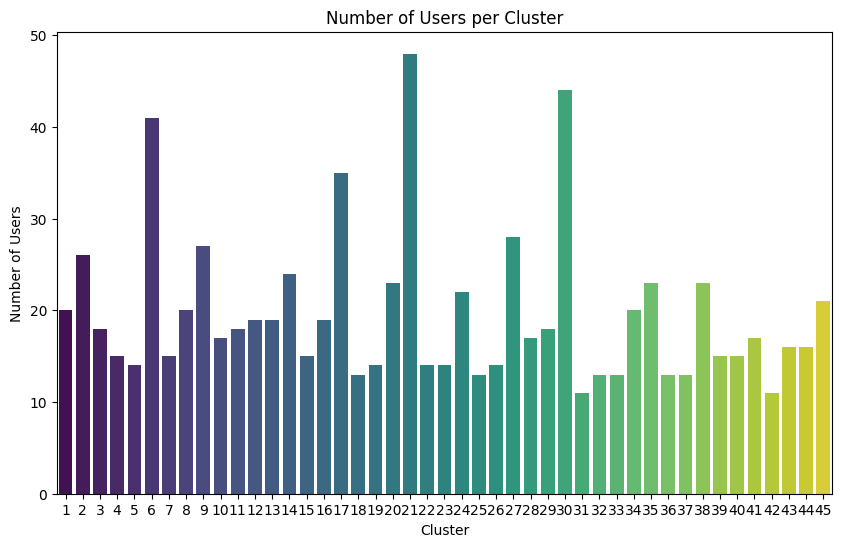

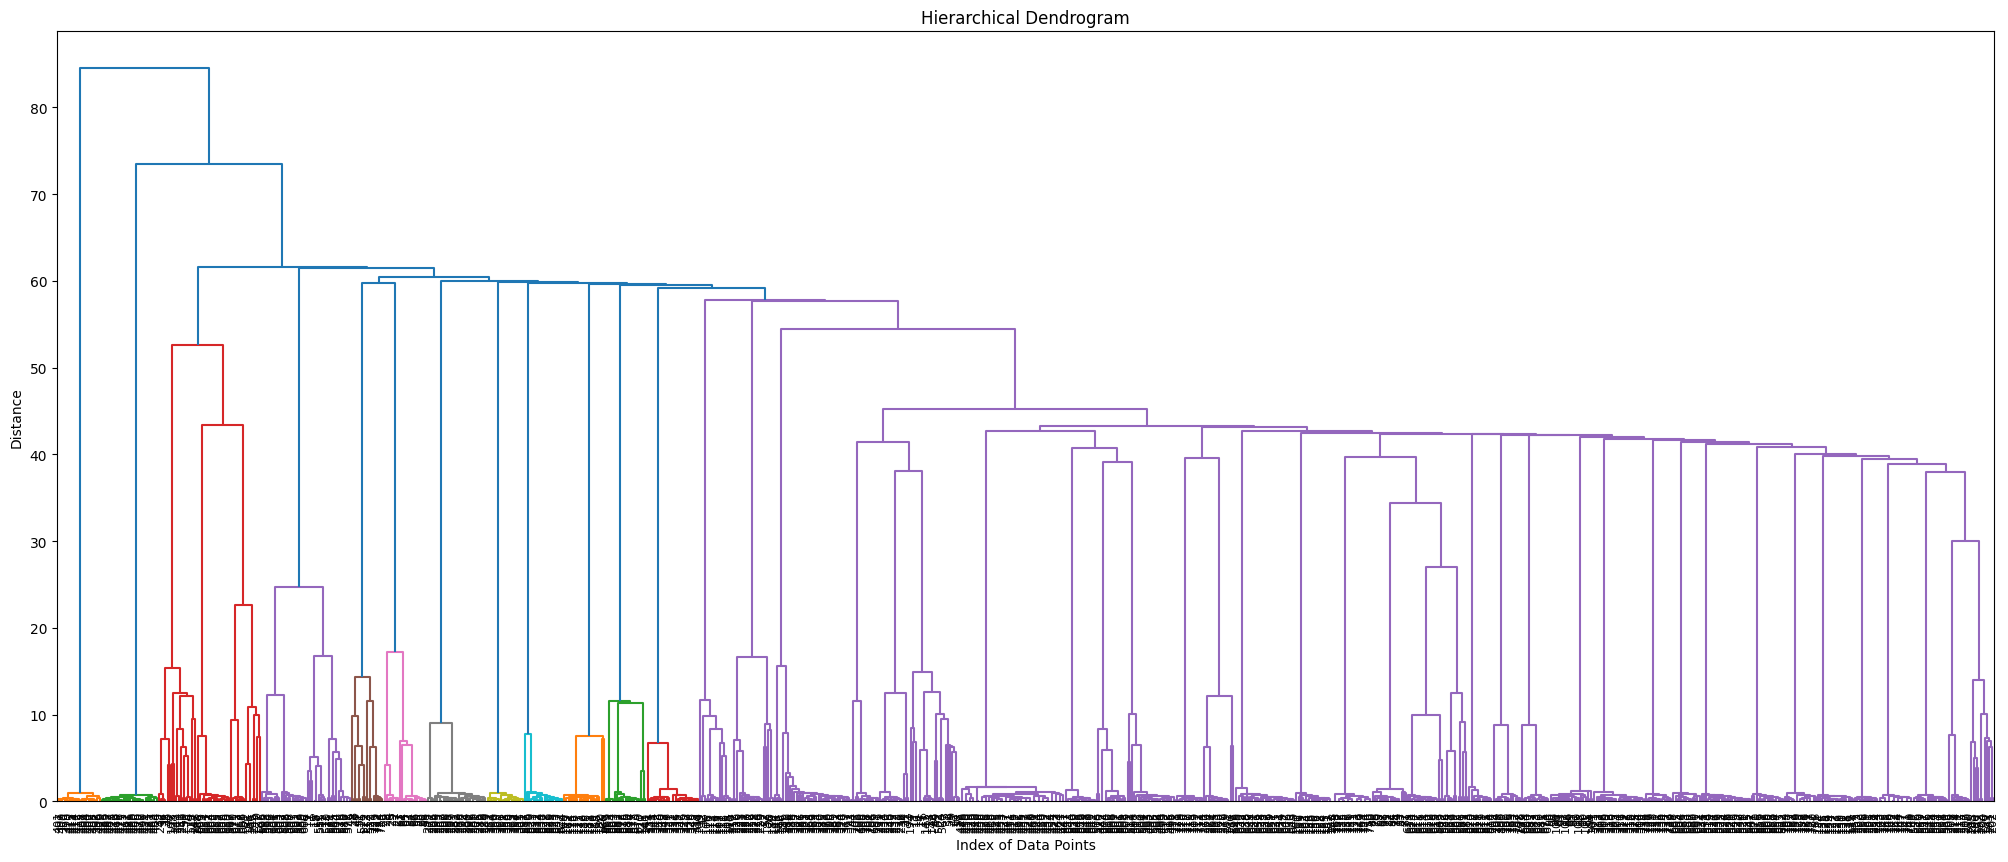

,username,user_id,followers_count,posts_count,posts,interests,interests_text,caption_vector,cluster
0,Cristiano Ronaldo,17841401692602711,628547369,3666,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...","{'Business and Industry': ['social media', 'Bu...",social media Business family parenting Physica...,"[0.016651653, 0.07860017, 0.025384158, 0.04606...",5
1,Kim Kardashian,17841401819740287,363764061,6169,"[{'media_type': 'IMAGE', 'media_url': 'https:/...","{'Business and Industry': ['social media', 'Bu...",social media Business beauty clothing fashion ...,"[0.016096478, 0.04923778, 0.02621374, 0.094995...",6
2,𝐃𝐫. 𝐌𝐢𝐤𝐞 𝐕𝐚𝐫𝐬𝐡𝐚𝐯𝐬𝐤𝐢,17841400513960353,4468310,902,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...","{'Business and Industry': ['social media', 'He...",social media Health care,"[0.015294308, 0.071935505, 0.021561738, 0.0449...",8
3,Tyler “Ninja” Blevins,17841402089909710,12414555,1994,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...","{'Business and Industry': ['social media'], 'E...",social media Games,"[0.03607523, 0.03410085, 0.009158016, 0.087567...",20
4,American Heart Association,17841401133162924,428520,3926,"[{'media_type': 'IMAGE', 'media_url': 'https:/...","{'Business and Industry': ['social media', 'He...",social media Health care,"[-0.006266756, 0.049643658, 0.008055339, 0.084...",8
...,...,...,...,...,...,...,...,...,...
879,Marques Brownlee,17841400463380452,4857378,1974,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']},consumer electronics,"[0.018470265, 0.035502613, 0.016858662, 0.0716...",13
880,iPhone Photography School,17841400070170876,3785467,3052,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...",{'Technology': ['consumer electronics']},consumer electronics,"[0.022159789, 0.042083602, -0.0009156368, 0.03...",13
881,Beebom,17841403462026706,3160479,1039,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']},consumer electronics,"[0.023539161, 0.032662358, -0.006168248, 0.079...",13
882,Lewis Hilsenteger,17841401804410477,2860974,3598,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",{'Technology': ['consumer electronics']},consumer electronics,"[0.012145619, 0.014253215, -0.007990025, 0.063...",13


In [ ]:
# Appliquer le clustering hiérarchique avec le nombre de clusters désiré
num_clusters = 45  # Spécifiez le nombre de clusters désiré
combined_vectors = np.hstack((tfidf_matrix_normalized,np.vstack(df['caption_vector'].values)))  # Fusionner les matrices normalisées
cluster_labels = hierarchical_clustering(combined_vectors, num_clusters)
df


In [ ]:
cluster_counts = df['cluster'].value_counts()
cluster_counts

cluster
21    48
30    44
6     41
17    35
27    28
9     27
2     26
14    24
35    23
20    23
38    23
24    22
45    21
1     20
34    20
8     20
13    19
16    19
12    19
3     18
11    18
29    18
28    17
10    17
41    17
44    16
43    16
40    15
39    15
4     15
15    15
7     15
23    14
26    14
19    14
22    14
5     14
32    13
33    13
18    13
37    13
25    13
36    13
42    11
31    11
Name: count, dtype: int64

In [ ]:
# Afficher les utilisateurs d'un cluster spécifique
cluster_id_to_display = 5
print(f"Users in the Cluster {cluster_id_to_display}:")
cluster_users = df[df['cluster'] == cluster_id_to_display]['username'].tolist()
print(cluster_users)

Users in the Cluster 5:
['Cristiano Ronaldo', 'David Beckham', 'Álvaro Morata', 'Álvaro Morata', 'Leo Messi', 'Jack Grealish', 'Rúben Gato Dias 🇵🇹', 'Nike', 'Real Madrid C.F.', 'FC Bayern', 'UEFA Champions League', 'Kyle Walker', 'Premier League', '𝐋𝐈𝐕𝐄 HERE WE GO 🚨']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity_matrix_for_cluster(df, cluster_id, combined_vectors):
    # Extract the indices of users in the specified cluster
    cluster_indices = df[df['cluster'] == cluster_id].index

    # Extract the combined vectors for the users in this cluster
    cluster_vectors = combined_vectors[cluster_indices]

    # Compute the cosine similarity matrix for these vectors
    similarity_matrix = cosine_similarity(cluster_vectors)

    return similarity_matrix

# Example usage:
cluster_id_to_display = 5
similarity_matrix = calculate_similarity_matrix_for_cluster(df, cluster_id_to_display, combined_vectors)

print(f"Similarity matrix for users in Cluster {cluster_id_to_display}:")
print(similarity_matrix)

Similarity matrix for users in Cluster 5:
[[1.         0.76408163 0.72225644 0.72225745 0.70182366 0.79438801
  0.79453449 0.52721545 0.51791056 0.51837517 0.51818135 0.51796366
  0.5175587  0.5177957 ]
 [0.76408163 1.         0.93409471 0.93409145 0.56096075 0.75248047
  0.75206737 0.49923552 0.49068846 0.49113879 0.49089153 0.49084706
  0.49029531 0.49065216]
 [0.72225644 0.93409471 1.         0.9999997  0.6072678  0.80689387
  0.80659826 0.39611223 0.52779327 0.52812008 0.52784191 0.52794922
  0.52744598 0.52785824]
 [0.72225745 0.93409145 0.9999997  1.         0.60728324 0.80689188
  0.80659947 0.39611455 0.52779657 0.52812028 0.52784324 0.52794714
  0.52744991 0.52786145]
 [0.70182366 0.56096075 0.6072678  0.60728324 1.         0.61062162
  0.61103414 0.56345702 0.73299879 0.73222612 0.73201405 0.73232907
  0.73258915 0.7327344 ]
 [0.79438801 0.75248047 0.80689387 0.80689188 0.61062162 1.
  0.9995753  0.50261255 0.65543719 0.65609201 0.65596038 0.65573757
  0.65526875 0.65564446]


In [ ]:
def interests_to_text(interests):
    all_interests = []
    for category, sub_interests in interests.items():
        all_interests.extend(sub_interests)
    return ', '.join(all_interests)

# Ajouter une colonne interests_text en convertissant les intérêts
df['interests_text'] = df['interests'].apply(interests_to_text)

In [ ]:
cluster_profiles = df.groupby('cluster')['interests_text'].apply(lambda x: ', '.join(set(', '.join(x).split(', ')))).reset_index()
cluster_profiles.to_csv('/content/drive/MyDrive/cluster_profiles.csv', index=False)
cluster_profiles

,cluster,interests_text
0,1,current event homes and garden
1,2,political and socials issues
2,3,"parenting, volleyball, Physical exercise, soci..."
3,4,"family, american football"
4,5,"parenting, Physical exercise, social media, be..."
5,6,"social media, shopping, fashion accessories, m..."
6,7,"Physical exercise, social media, travel, live ..."
7,8,"social media, parenting, Health care, bodybuil..."
8,9,"beverages, alcoholic beverage"
9,10,food and restaurant


In [ ]:
#Affichage du cluster-profile pour le cluster 45
cluster_6_profile = cluster_profiles[cluster_profiles['cluster'] == 6]['interests_text'].values[0]
cluster_6_profile

'shopping, social media, fashion accessories, clothing, music, Business, beauty'

In [ ]:
# Initialiser le TfidfVectorizer
vectorizer = TfidfVectorizer()

# Appliquer le vectorizer sur les profils des clusters
cluster_interests_vectors= vectorizer.fit_transform(cluster_profiles['interests_text'])

# Normaliser les vecteurs TF-IDF
cluster_interests_vectors_normalized = StandardScaler().fit_transform(cluster_interests_vectors.toarray())
cluster_interests_vectors_normalized

array([[-0.3434875 , -0.15075567, -0.15075567, ..., -0.23954563,
        -0.23095942, -0.26049455],
       [-0.3434875 , -0.15075567, -0.15075567, ..., -0.23954563,
        -0.23095942, -0.26049455],
       [-0.3434875 , -0.15075567, -0.15075567, ..., -0.23954563,
         1.60111626,  1.42951725],
       ...,
       [-0.3434875 , -0.15075567, -0.15075567, ..., -0.23954563,
        -0.23095942, -0.26049455],
       [-0.3434875 , -0.15075567, -0.15075567, ..., -0.23954563,
        -0.23095942, -0.26049455],
       [-0.3434875 , -0.15075567, -0.15075567, ..., -0.23954563,
         2.1263502 ,  1.9140232 ]])

# Matching between the hotel users and instagram  users

### load aspects

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Adjust this path based on where the file is located
file_path = '/content/drive/MyDrive/PFA /user_aspects.csv'


users_aspects_df = pd.read_csv(file_path)
# Identifier la colonne sans nom
unnamed_column = users_aspects_df.columns[users_aspects_df.columns.str.contains('^Unnamed')]

# Supprimer la colonne sans nom si elle existe
if not unnamed_column.empty:
    users_aspects_df.drop(columns=unnamed_column, inplace=True)

# supprimer les aspects avec NAN
users_aspects_df = users_aspects_df.dropna(subset=['aspects'])

# Afficher le DataFrame
users_aspects_df




,reviewed_by,aspects
0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J..."
1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B..."
2,Virginia,"problem,Couple,room Business trip,location Bus..."
3,Kannan,"Solo traveller,stay,Business trip,Stayed 4 nig..."
4,Sue,"Couple,owner Leisure trip,Standard Queen Room,..."
...,...,...
8391,Aynur,"Stayed 1 night,Couple,room,Double Room,Submitt..."
8392,Chrizzer,"Studio (2 Adults),Stayed 1 night,,Family with ..."
8393,Olya,"Solo traveller,place,Stayed 3 nights,Double Ro..."
8394,Subodh,"Solo traveller,Standard Double Room,,Stayed 2 ..."


### generationde la matrice similarity_matrix_aspects_interests

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
import numpy as np



In [ ]:
# Assurez-vous d'avoir téléchargé les ressources nécessaires
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Initialiser le lemmatizer
lemmatizer = WordNetLemmatizer()

# Fonction pour lemmatiser et trouver les synonymes
def expand_synonyms(text):
    tokens = word_tokenize(text.lower())
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    synonyms = set()
    for lemma in lemmas:
        synonyms.add(lemma)
        for syn in wn.synsets(lemma):
            for l in syn.lemmas():
                synonyms.add(l.name())
    return synonyms

# Prétraiter les données des deux DataFrames
cluster_profiles['expanded_interests'] = cluster_profiles['interests_text'].apply(expand_synonyms)
users_aspects_df['expanded_aspects'] = users_aspects_df['aspects'].apply(expand_synonyms)



# Fonction de similarité sémantique utilisant Wu-Palmer Similarity
# def semantic_similarity(aspects, interests):
#     max_sim = 0
#     for aspect in aspects:
#         for interest in interests:
#             aspect_synsets = wn.synsets(aspect)
#             interest_synsets = wn.synsets(interest)
#             for aspect_syn in aspect_synsets:
#                 for interest_syn in interest_synsets:
#                     sim = aspect_syn.wup_similarity(interest_syn)
#                     if sim and sim > max_sim:
#                         max_sim = sim
#     return max_sim



In [ ]:
cluster_profiles.head()


,cluster,interests_text,expanded_interests
0,1,current event homes and garden,"{domicile, family, dwelling, home_base, house,..."
1,2,political and socials issues,"{go_forth, number, military_issue, take, suppl..."
2,3,"Business, clothing, family, Physical exercise,...","{break_away, workout, lean, ,, family, persist..."
3,4,"american football, family","{,, family, kinsperson, house, American, categ..."
4,5,"Business, clothing, football/soccer, basketbal...","{workout, basketball, ,, family, societal, sty..."


In [ ]:
users_aspects_df.head()

,reviewed_by,aspects,expanded_aspects
0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J...","{Jnr, persist, stayed, ,, stick, I, take, stay..."
1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...","{residue, persist, ii, jazz, state, get_laid, ..."
2,Virginia,"problem,Couple,room Business trip,location Bus...","{Little_Joe, persist, ii, placement, state, bi..."
3,Kannan,"Solo traveller,stay,Business trip,Stayed 4 nig...","{Little_Joe, Jnr, persist, stick, ,, stayed, t..."
4,Sue,"Couple,owner Leisure trip,Standard Queen Room,...","{Little_Joe, persist, ii, avail, drinking, pla..."


In [ ]:
from gensim.models import KeyedVectors
import numpy as np

# Charger le modèle Word2Vec pré-entraîné (Google News)
# Assurez-vous que le chemin vers le fichier 'GoogleNews-vectors-negative300.bin' est correct
#model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)



def get_vector(word, model):
    try:
        return model[word]
    except KeyError:
        return np.zeros(model.vector_size)

def average_vector(words, model):
    vectors = [get_vector(word, model) for word in words]
    return np.mean(vectors, axis=0)

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))



In [ ]:

list1=["healthcare", "diet","sport"]
list2=["food", "property"]
list3=["room", "clean","piscine"]



vector1 = average_vector(list1, model)
vector2 = average_vector(list2, model)
vector3 = average_vector(list3, model)


print("Cosine Similarity:", cosine_similarity(vector1, vector2))
print("Cosine Similarity:", cosine_similarity(vector1, vector3))
print("Cosine Similarity:", cosine_similarity(vector1, vector4))
print("Cosine Similarity:", cosine_similarity(vector3, vector4))

['children', 'love', 'care']
Cosine Similarity: 0.21205274736437976
Cosine Similarity: 0.19419126622548083
Cosine Similarity: 0.3052971801413255
Cosine Similarity: 0.20077924


In [ ]:
def cosine_similarity_personalized(aspects, interests):
    vector1 = average_vector(aspects, word2vec_model)
    vector2 = average_vector(interests, word2vec_model)

    # Vérifier que les vecteurs ont des tailles cohérentes
    if len(vector1) == 0 or len(vector2) == 0:
        return 0  # Si l'un des vecteurs est vide, la similarité est nulle
    elif len(vector1) != len(vector2):
        raise ValueError("Les vecteurs n'ont pas la même taille")

    sim = cosine_similarity(vector1, vector2)
    return sim

In [ ]:
similarity_matrix = np.zeros((users_aspects_df.shape[0], cluster_profiles.shape[0]))

for i, user_aspects in enumerate(users_aspects_df['expanded_aspects']):
    print(f"Calcul de la similarité pour l'utilisateur {i+1}/{users_aspects_df.shape[0]}")
    for j, cluster_interests in enumerate(cluster_profiles['expanded_interests']):
        similarity_matrix[i, j] = cosine_similarity_personalized(user_aspects, cluster_interests)
        print(f"  Cluster {j+1}/{cluster_profiles.shape[0]}: Similarité calculée = {similarity_matrix[i, j]}")

print("Matrice de similarité calculée :")
print(similarity_matrix)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  Cluster 22/45: Similarité calculée = 0.40707213777600654
  Cluster 23/45: Similarité calculée = 0.5842552147475734
  Cluster 24/45: Similarité calculée = 0.5264615672244732
  Cluster 25/45: Similarité calculée = 0.18041504209557288
  Cluster 26/45: Similarité calculée = 0.7752899007381769
  Cluster 27/45: Similarité calculée = 0.5042934354619417
  Cluster 28/45: Similarité calculée = 0.5702754628742093
  Cluster 29/45: Similarité calculée = 0.17125798180674923
  Cluster 30/45: Similarité calculée = 0.5955300771792195
  Cluster 31/45: Similarité calculée = 0.22807469459072496
  Cluster 32/45: Similarité calculée = 0.48159828554905926
  Cluster 33/45: Similarité calculée = 0.4762937313694259
  Cluster 34/45: Similarité calculée = 0.2833151369594592
  Cluster 35/45: Similarité calculée = 0.2197565605737863
  Cluster 36/45: Similarité calculée = 0.1901034451121223
  Cluster 37/45: Similarité calculée = 0.228062

In [ ]:
import os
os.chdir("/content/drive/MyDrive/PFA /")

similarity_df = pd.DataFrame(similarity_matrix, index=users_aspects_df.index, columns=cluster_profiles.index)

similarity_df.to_csv("similarity_matrix_aspects_interests.csv",index=True)

### affectation des clusters aux users

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
import json
import matplotlib.pyplot as plt


In [ ]:
# Spécifiez le chemin complet vers le fichier CSV dans le dossier partagé
file_path = '/content/drive/MyDrive/PFA /similarity_matrix_aspects_interests.csv'

# Load the CSV file
similarity_matrix_df = pd.read_csv(file_path)
# Identifier la colonne sans nom
unnamed_column = similarity_matrix_df.columns[similarity_matrix_df.columns.str.contains('^Unnamed')]

# Supprimer la colonne sans nom si elle existe
if not unnamed_column.empty:
    similarity_matrix_df.drop(columns=unnamed_column, inplace=True)

# Display the first few rows
similarity_matrix_df.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.556664,0.590656,0.767833,0.479616,0.655834,0.618788,0.751501,0.587625,0.299300,0.191991,...,0.206151,0.220756,0.217871,0.216420,0.179507,0.521377,0.146797,0.376635,0.349967,0.694072
1,0.701561,0.626919,0.857094,0.662865,0.838519,0.800818,0.804675,0.689857,0.462430,0.339353,...,0.250532,0.273895,0.206579,0.317592,0.225849,0.615240,0.260059,0.399743,0.558706,0.844417
2,0.722959,0.632152,0.831005,0.633030,0.825836,0.785154,0.786756,0.662587,0.481543,0.366554,...,0.267968,0.270025,0.279986,0.334166,0.226096,0.589654,0.252214,0.422001,0.535585,0.817343
3,0.649856,0.629124,0.805580,0.561146,0.721247,0.669550,0.768054,0.635939,0.333672,0.273163,...,0.209634,0.238041,0.261584,0.256483,0.178807,0.542405,0.172141,0.373579,0.372351,0.737063
4,0.708096,0.663522,0.871474,0.615774,0.854088,0.821824,0.828355,0.701891,0.478516,0.343499,...,0.248295,0.268705,0.248143,0.363224,0.218487,0.620978,0.249346,0.409279,0.559762,0.826613


In [ ]:

# Trouver le cluster avec la plus haute similarité pour chaque utilisateur
users_aspects_df['assigned_cluster'] = similarity_matrix_df.idxmax(axis=1)

# Afficher le DataFrame avec les clusters assignés
users_aspects_df[['username', 'aspects', 'assigned_cluster']]

,username,aspects,assigned_cluster
0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J...",cluster
1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",cluster
2,Virginia,"problem,Couple,room Business trip,location Bus...",cluster
3,Kannan,"Solo traveller,stay,Business trip,Stayed 4 nig...",cluster
4,Sue,"Couple,owner Leisure trip,Standard Queen Room,...",cluster
...,...,...,...
8391,Aynur,"Stayed 1 night,Couple,room,Double Room,Submitt...",cluster
8392,Chrizzer,"Studio (2 Adults),Stayed 1 night,,Family with ...",cluster
8393,Olya,"Solo traveller,place,Stayed 3 nights,Double Ro...",cluster
8394,Subodh,"Solo traveller,Standard Double Room,,Stayed 2 ...",cluster


In [ ]:
import pandas as pd

# Adjust this path based on where the file is located
file_path = '/content/drive/MyDrive/PFA /user_aspects2.csv'

# Load the CSV file
users_aspects_df = pd.read_csv(file_path)

# Display the first few rows
users_aspects_df.head()


,Unnamed: 0,username,aspects,assigned_cluster
0,0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J...",25
1,1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19
2,2,Virginia,"problem,Couple,room Business trip,location Bus...",19
3,3,Kannan,"Solo traveller,stay,Business trip,Stayed 4 nig...",25
4,4,Sue,"Couple,owner Leisure trip,Standard Queen Room,...",19


In [ ]:
# Charger le fichier CSV original
hotel_reviews_df = pd.read_csv('/content/drive/MyDrive/PFA /hotel_review_sentiment_dataset.csv')

In [ ]:
hotel_reviews_df

,Unnamed: 0,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment,predicted_score,predicted_sentiment
0,0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",Positive,0.999794,Positive
1,1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,Positive,0.995007,Positive
2,2,Virginia,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,10.0,Leisure trip~Couple~Apartment with Sea View~St...,exceptional. it was just what we wanted for a ...,Positive,0.999318,Positive
3,3,Kannan,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,my stay in the house was a experiencing bliss ...,Positive,0.966287,Positive
4,4,Sue,Hydro Palace Apartment,https://www.booking.com/hotel/be/hydro-palace....,9.2,Leisure trip~People with friends~Apartment wit...,one bedroom apartment with wonderful view and ...,Positive,0.897018,Positive
...,...,...,...,...,...,...,...,...,...,...
26381,26670,Dragos,Hotel Euro Capital Brussels,https://www.booking.com/hotel/be/euro-capital-...,8.8,Business trip~Solo traveller~Double or Twin Ro...,good stay. had a room with the view to the mai...,Positive,0.995976,Positive
26382,26671,Anonymous,Glamping op het Zeugekot,https://www.booking.com/hotel/be/glamping-op-h...,10.0,Leisure trip~Family with young children~Tent~S...,"exceptional. there was not to like. , was ex...",Positive,0.997774,Positive
26383,26672,Zhl,NH Brussels Carrefour de L’Europe,https://www.booking.com/hotel/be/carrefour.en-...,7.9,Leisure trip~Couple~Standard Double or Twin Ro...,good. poor internet connection and aircon in r...,Positive,0.787512,Positive
26384,26673,Bruno,Hotel Bilderdijk,https://www.booking.com/hotel/be/bilderdijk.en...,8.3,Leisure trip~Couple~Basic Double Room~Stayed 1...,very good.,Positive,0.975523,Positive


### merge des 2 df par nom d'utilisateur

In [ ]:
# Ajouter la colonne "cluster" au DataFrame original
#hotel_reviews_df['cluster'] = users_aspects_df['assigned_cluster']
hotel_reviews_df = pd.merge(users_aspects_df, hotel_reviews_df, left_on='username', right_on='reviewed_by',how='inner')
# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
hotel_reviews_df.to_csv('/content/drive/MyDrive/hotel_review_sentiment_dataset_updated.csv', index=False)

In [ ]:
hotel_reviews_df1=hotel_reviews_df
hotel_reviews_df1

,Unnamed: 0_x,username,aspects,assigned_cluster,Unnamed: 0_y,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment,predicted_score,predicted_sentiment
0,0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J...",25,0,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",Positive,0.999794,Positive
1,1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,1,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,Positive,0.995007,Positive
2,1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,854,Dimitri,Novotel Gent Centrum,https://www.booking.com/hotel/be/novotelgentce...,7.1,Business trip~Solo traveller~Superior Double R...,good.,Positive,0.993026,Positive
3,1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,3520,Dimitri,Hotel Dolce La Hulpe Brussels,https://www.booking.com/hotel/be/dolce-la-hulp...,8.0,Leisure trip~Couple~Executive Double Room with...,very good ration between price and quality exc...,Positive,0.493406,Negative
4,1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,5654,Dimitri,B&B Le flaneur,https://www.booking.com/hotel/be/le-flaneur.en...,10.0,Leisure trip~Couple~Deluxe Double Room~Stayed ...,"charming. the rooms, the hosts and the little ...",Positive,0.984048,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26381,8391,Aynur,"Stayed 1 night,Couple,room,Double Room,Submitt...",25,26658,Aynur,Hotel Du Congres,https://www.booking.com/hotel/be/ducongres.en-...,9.6,Leisure trip~Couple~Double Room~Stayed 1 night...,best hotel. the best hotel i have ever stay. r...,Positive,0.520505,Positive
26382,8392,Chrizzer,"Studio (2 Adults),Stayed 1 night,,Family with ...",44,26664,Chrizzer,Aparthotel Adagio Access Bruxelles Europe Apar...,https://www.booking.com/hotel/be/adagio-access...,10.0,Leisure trip~Family with young children~Studio...,great deal!.,Positive,0.998312,Positive
26383,8393,Olya,"Solo traveller,place,Stayed 3 nights,Double Ro...",25,26667,Olya,Logies Windsor,https://www.booking.com/hotel/be/windsor-castl...,10.0,Leisure trip~Solo traveller~Double Room~Stayed...,"exceptional. was great. thank you!, the guest...",Positive,0.999799,Positive
26384,8394,Subodh,"Solo traveller,Standard Double Room,,Stayed 2 ...",2,26668,Subodh,Hotel Ter Elst,https://www.booking.com/hotel/be/best-western-...,9.0,Business trip~Solo traveller~Standard Double R...,superb.,Positive,0.996989,Positive


In [ ]:
# Identifier la colonne sans nom
unnamed_column = hotel_reviews_df.columns[hotel_reviews_df.columns.str.contains('^Unnamed')]

# Supprimer la colonne sans nom si elle existe
if not unnamed_column.empty:
    hotel_reviews_df.drop(columns=unnamed_column, inplace=True)


In [ ]:
hotel_reviews_df

,username,aspects,assigned_cluster,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment,predicted_score,predicted_sentiment
0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J...",25,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",Positive,0.999794,Positive
1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,Positive,0.995007,Positive
2,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,Dimitri,Novotel Gent Centrum,https://www.booking.com/hotel/be/novotelgentce...,7.1,Business trip~Solo traveller~Superior Double R...,good.,Positive,0.993026,Positive
3,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,Dimitri,Hotel Dolce La Hulpe Brussels,https://www.booking.com/hotel/be/dolce-la-hulp...,8.0,Leisure trip~Couple~Executive Double Room with...,very good ration between price and quality exc...,Positive,0.493406,Negative
4,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,Dimitri,B&B Le flaneur,https://www.booking.com/hotel/be/le-flaneur.en...,10.0,Leisure trip~Couple~Deluxe Double Room~Stayed ...,"charming. the rooms, the hosts and the little ...",Positive,0.984048,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
26381,Aynur,"Stayed 1 night,Couple,room,Double Room,Submitt...",25,Aynur,Hotel Du Congres,https://www.booking.com/hotel/be/ducongres.en-...,9.6,Leisure trip~Couple~Double Room~Stayed 1 night...,best hotel. the best hotel i have ever stay. r...,Positive,0.520505,Positive
26382,Chrizzer,"Studio (2 Adults),Stayed 1 night,,Family with ...",44,Chrizzer,Aparthotel Adagio Access Bruxelles Europe Apar...,https://www.booking.com/hotel/be/adagio-access...,10.0,Leisure trip~Family with young children~Studio...,great deal!.,Positive,0.998312,Positive
26383,Olya,"Solo traveller,place,Stayed 3 nights,Double Ro...",25,Olya,Logies Windsor,https://www.booking.com/hotel/be/windsor-castl...,10.0,Leisure trip~Solo traveller~Double Room~Stayed...,"exceptional. was great. thank you!, the guest...",Positive,0.999799,Positive
26384,Subodh,"Solo traveller,Standard Double Room,,Stayed 2 ...",2,Subodh,Hotel Ter Elst,https://www.booking.com/hotel/be/best-western-...,9.0,Business trip~Solo traveller~Standard Double R...,superb.,Positive,0.996989,Positive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/PFA /")
hotel_reviews_df.to_csv('hotel_review_sentiment_dataset_with_cluster.csv', index=False)

In [ ]:
# Supprimer les colonnes inutiles
columns_to_drop = ['reviewed_by', 'rating', 'tags', 'final_review', 'Label_Sentiment', 'predicted_sentiment']
hotel_reviews_df1= hotel_reviews_df.drop(columns=columns_to_drop)

# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
hotel_reviews_df1.to_csv('/content/drive/MyDrive/hotel_review_sentiment_dataset_updated.csv', index=False)
hotel_reviews_df1.to_csv('hotel_review_sentiment_dataset_updated.csv', index=False)

In [ ]:
hotel_reviews_df1

,username,aspects,assigned_cluster,hotel_name,hotel_url,predicted_score
0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J...",25,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,0.999794
1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,0.995007
2,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,Novotel Gent Centrum,https://www.booking.com/hotel/be/novotelgentce...,0.993026
3,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,Hotel Dolce La Hulpe Brussels,https://www.booking.com/hotel/be/dolce-la-hulp...,0.493406
4,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,B&B Le flaneur,https://www.booking.com/hotel/be/le-flaneur.en...,0.984048
...,...,...,...,...,...,...
26381,Aynur,"Stayed 1 night,Couple,room,Double Room,Submitt...",25,Hotel Du Congres,https://www.booking.com/hotel/be/ducongres.en-...,0.520505
26382,Chrizzer,"Studio (2 Adults),Stayed 1 night,,Family with ...",44,Aparthotel Adagio Access Bruxelles Europe Apar...,https://www.booking.com/hotel/be/adagio-access...,0.998312
26383,Olya,"Solo traveller,place,Stayed 3 nights,Double Ro...",25,Logies Windsor,https://www.booking.com/hotel/be/windsor-castl...,0.999799
26384,Subodh,"Solo traveller,Standard Double Room,,Stayed 2 ...",2,Hotel Ter Elst,https://www.booking.com/hotel/be/best-western-...,0.996989


In [ ]:
import pandas as pd

# Grouper par 'cluster' et 'hotel_name'
grouped = hotel_reviews_df1.groupby(['assigned_cluster', 'hotel_name']).agg(
    count=('hotel_name', 'size'),  # Nombre d'occurrences de chaque hôtel dans chaque cluster
    average_predicted_score=('predicted_score', 'mean')  # Moyenne du predicted_score
).reset_index()

# Renommer les colonnes pour plus de clarté
grouped.rename(columns={'count': 'occurrences'}, inplace=True)

# Enregistrer le nouveau DataFrame dans un fichier CSV
grouped.to_csv('/content/drive/MyDrive/hotel_review_sentiment_dataset_aggregated.csv', index=False)
grouped.to_csv('hotel_review_sentiment_dataset_aggregated.csv', index=False)
# Afficher le DataFrame résultant
grouped


,assigned_cluster,hotel_name,occurrences,average_predicted_score
0,2,""" Chimay B & B """,2,0.999373
1,2,"""En Aqualye"" chambre privative chez l'habitant",2,0.993269
2,2,"""Ter Ename n°2""",3,0.994198
3,2,'S Hertogenmolens Hotel,4,0.596547
4,2,'t Eenvoud,2,0.999521
...,...,...,...,...
2272,44,ibis Styles Liege Guillemins,6,0.997581
2273,44,ibis Styles Nivelles,1,0.997999
2274,44,ibis budget Antwerpen Port,3,0.597710
2275,44,nhow Brussels Bloom,3,0.982676


In [ ]:
import pandas as pd



# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
df.to_csv('/content/drive/MyDrive/Hotel_review_sentiment_dataset.csv', index=False)



In [ ]:
# Charger le fichier CSV original
filtered_df = hotel_reviews_df[(hotel_reviews_df1['assigned_cluster'] == 2) & (hotel_reviews_df['hotel_name'] == '"Ter Ename n°2"')]

# Afficher les colonnes 'reviewed_by' et 'predicted_score'
users_info = filtered_df[['reviewed_by', 'predicted_score']]

# Afficher le DataFrame résultant
users_info

,reviewed_by,predicted_score
6818,Luca,0.987246
11398,Giles,0.998549
11561,Bjarne,0.996799


In [ ]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('/content/drive/MyDrive/hotel_review_sentiment_dataset_aggregated.csv')
df = pd.read_csv('hotel_review_sentiment_dataset_aggregated.csv')

# Convertir la colonne 'cluster' en type catégoriel avec l'ordre spécifique de 0 à 44
#df['cluster'] = pd.Categorical(df['cluster'], categories=[str(i) for i in range(45)], ordered=True)

# Trier le DataFrame par cluster et average_predicted_score
df_sorted = grouped.sort_values(by=['assigned_cluster', 'average_predicted_score'], ascending=[True, False])


# Supprimer la colonne 'occurrences'
df_sorted.drop(columns=['occurrences'], inplace=True)

# Enregistrer le DataFrame trié dans un nouveau fichier CSV
df_sorted.to_csv('/content/drive/MyDrive/hotel_review_sentiment_dataset_aggregated_sorted.csv', index=False)
df_sorted.to_csv('hotel_review_sentiment_dataset_aggregated_sorted.csv', index=False)

# Afficher le DataFrame résultat
df_sorted


,assigned_cluster,hotel_name,average_predicted_score
155,2,B&B Sapere,0.999832
525,2,Les Bambous,0.999830
716,2,Wetterdelle,0.999815
521,2,Le dernier métro,0.999699
686,2,Usadba V hutorskoj tishy,0.999685
...,...,...,...
2080,44,B&B La ferme du Château de Broich,0.003515
2247,44,Studio Rempart,0.002223
2096,44,Center Parcs Erperheide,0.002015
2097,44,Century Hotel Antwerpen Centrum,0.000576


In [ ]:
import pandas as pd

# Charger les fichiers CSV
#df_sorted = pd.read_csv('hotel_review_sentiment_dataset_aggregated_sorted_cluster.csv')
#df_original = pd.read_csv('hotel_review_sentiment_dataset.csv')

# Créer un dictionnaire avec les noms d'hôtel et les URL correspondantes
hotel_url_dict = dict(zip(hotel_reviews_df['hotel_name'], hotel_reviews_df['hotel_url']))

# Ajouter une colonne 'hotel_url' au DataFrame trié en utilisant le dictionnaire
df_sorted['hotel_url'] = df_sorted['hotel_name'].map(hotel_url_dict)

# Enregistrer le DataFrame mis à jour dans un nouveau fichier CSV
df_sorted.to_csv('/content/drive/MyDrive/hotel_review_sentiment_dataset_aggregated_sorted_cluster_with_url.csv', index=False)
df_sorted.to_csv('hotel_review_sentiment_dataset_aggregated_sorted_cluster_with_url.csv', index=False)
df_sorted

,assigned_cluster,hotel_name,average_predicted_score,hotel_url
155,2,B&B Sapere,0.999832,https://www.booking.com/hotel/be/sapere.en-gb....
525,2,Les Bambous,0.999830,https://www.booking.com/hotel/be/les-bambous.e...
716,2,Wetterdelle,0.999815,https://www.booking.com/hotel/be/wetterdelle.e...
521,2,Le dernier métro,0.999699,https://www.booking.com/hotel/be/le-dernier-me...
686,2,Usadba V hutorskoj tishy,0.999685,https://www.booking.com/hotel/by/usad-ba-v-khu...
...,...,...,...,...
2080,44,B&B La ferme du Château de Broich,0.003515,https://www.booking.com/hotel/be/la-ferme-du-c...
2247,44,Studio Rempart,0.002223,https://www.booking.com/hotel/be/remparts.en-g...
2096,44,Center Parcs Erperheide,0.002015,https://www.booking.com/hotel/be/center-parcs-...
2097,44,Century Hotel Antwerpen Centrum,0.000576,https://www.booking.com/hotel/be/tourist-antwe...


In [ ]:
users_aspects_df

,Unnamed: 0,username,aspects,assigned_cluster
0,0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J...",25
1,1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19
2,2,Virginia,"problem,Couple,room Business trip,location Bus...",19
3,3,Kannan,"Solo traveller,stay,Business trip,Stayed 4 nig...",25
4,4,Sue,"Couple,owner Leisure trip,Standard Queen Room,...",19
...,...,...,...,...
8391,8391,Aynur,"Stayed 1 night,Couple,room,Double Room,Submitt...",25
8392,8392,Chrizzer,"Studio (2 Adults),Stayed 1 night,,Family with ...",44
8393,8393,Olya,"Solo traveller,place,Stayed 3 nights,Double Ro...",25
8394,8394,Subodh,"Solo traveller,Standard Double Room,,Stayed 2 ...",2


#Final Recommendation  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
import pandas as pd

# Read the datasets
user_data = pd.read_csv("/content/drive/MyDrive/user_aspects2.csv")
cluster_data = pd.read_csv("/content/drive/MyDrive/cluster_profiles.csv")

# Map cluster ID to corresponding interest text
cluster_map = dict(zip(cluster_data["cluster"], cluster_data["interests_text"]))

# Add a new column with "no interest" as default value
user_data["interest_text"] = "no interest"

# Assign interest text based on cluster ID
user_data["interest_text"] = user_data["assigned_cluster"].apply(lambda x: cluster_map.get(x))

# Save the updated dataset
user_data.to_csv("/content/drive/MyDrive/user_aspects2.csv", index=False)

user_data
print("Successfully added 'interest_text' column to user_aspects2.csv!")

Successfully added 'interest_text' column to user_aspects2.csv!


In [ ]:
import pandas as pd

# Charger les datasets
hotel_df = pd.read_csv('/content/drive/MyDrive/hotel_review_sentiment_dataset_aggregated_sorted_cluster_with_url.csv')
aspects_df = pd.read_csv('/content/drive/MyDrive/user_aspects2.csv')

# Filtrer les données pour exclure les valeurs "nan"
aspects_df = aspects_df.dropna(subset=['aspects'])

# Fusionner les deux datasets sur assigned_cluster et username
merged_df = pd.merge(hotel_df, aspects_df, on=['assigned_cluster'], how='inner')

# Regrouper les données par hôtel, cluster et aspects
grouped_df = merged_df.groupby(['hotel_name', 'assigned_cluster']).agg({'aspects': lambda x: ','.join(set(x))}).reset_index()

# Sauvegarder le nouveau dataset
grouped_df.to_csv('/content/drive/MyDrive/new_hotel_aspect_dataset.csv', index=False)

print(grouped_df.head())


                                       hotel_name  assigned_cluster  \
0                                " Chimay B & B "                 2   
1                                " Chimay B & B "                19   
2                                " Chimay B & B "                25   
3  "En Aqualye" chambre privative chez l'habitant                 2   
4  "En Aqualye" chambre privative chez l'habitant                19   

                                             aspects  
0  Solo traveller,Stayed 1 night,Couple,centre,Sm...  
1  Solo traveller,,Stayed 6 nights,Business trip,...  
2  Group,Classic Twin Room,pricing,Stayed 4 night...  
3  Solo traveller,Stayed 1 night,Couple,centre,Sm...  
4  Solo traveller,,Stayed 6 nights,Business trip,...  


In [ ]:
# Ajouter la colonne "cluster" au DataFrame original
#hotel_reviews_df['cluster'] = users_aspects_df['assigned_cluster']
aspects_df = pd.read_csv('/content/drive/MyDrive/user_aspects2.csv')
hotel_aspect_df = pd.read_csv('/content/drive/MyDrive/Hotel_aspects.csv')

hotel_reviews_df = pd.merge(aspects_df, hotel_aspect_df, left_on='username', right_on='reviewed_by',how='inner')
# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
hotel_reviews_df.to_csv('/content/drive/MyDrive/Hotel_aspects_updated.csv', index=False)

In [ ]:
# Identifier la colonne sans nom
unnamed_column = hotel_reviews_df.columns[hotel_reviews_df.columns.str.contains('^Unnamed')]

# Supprimer la colonne sans nom si elle existe
if not unnamed_column.empty:
    hotel_reviews_df.drop(columns=unnamed_column, inplace=True)


In [ ]:
hotel_reviews_df

,username,aspects_x,assigned_cluster,interest_text,reviewed_by,hotel_name,hotel_url,rating,tags,final_review,Label_Sentiment,predicted_score,predicted_sentiment,aspects_y
0,Kyrylo,"Solo traveller,Stayed 1 night,,Business trip,J...",25,marathon,Kyrylo,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,10.0,Business trip~Solo traveller~Junior Suite~Stay...,"exceptional. was perfect! quite, cozy place t...",Positive,0.999736,Positive,[]
1,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,"social media, bodybuilding",Dimitri,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,9.0,Leisure trip~Couple~Deluxe Suite~Stayed 1 nigh...,i highly recommend this b&b! we enjoyed it a l...,Positive,0.997360,Positive,[]
2,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,"social media, bodybuilding",Dimitri,Novotel Gent Centrum,https://www.booking.com/hotel/be/novotelgentce...,7.1,Business trip~Solo traveller~Superior Double R...,good.,Positive,0.993814,Positive,[]
3,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,"social media, bodybuilding",Dimitri,Hotel Dolce La Hulpe Brussels,https://www.booking.com/hotel/be/dolce-la-hulp...,8.0,Leisure trip~Couple~Executive Double Room with...,very good ration between price and quality exc...,Positive,0.972455,Positive,"['food', 'spa']"
4,Dimitri,"Deluxe Suite,Executive Double Room with Sofa B...",19,"social media, bodybuilding",Dimitri,B&B Le flaneur,https://www.booking.com/hotel/be/le-flaneur.en...,10.0,Leisure trip~Couple~Deluxe Double Room~Stayed ...,"charming. the rooms, the hosts and the little ...",Positive,0.992628,Positive,"['breakfast', 'hosts', 'rooms']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26381,Aynur,"Stayed 1 night,Couple,room,Double Room,Submitt...",25,marathon,Aynur,Hotel Du Congres,https://www.booking.com/hotel/be/ducongres.en-...,9.6,Leisure trip~Couple~Double Room~Stayed 1 night...,best hotel. the best hotel i have ever stay. r...,Positive,0.579169,Positive,['room']
26382,Chrizzer,"Studio (2 Adults),Stayed 1 night,,Family with ...",44,beauty,Chrizzer,Aparthotel Adagio Access Bruxelles Europe Apar...,https://www.booking.com/hotel/be/adagio-access...,10.0,Leisure trip~Family with young children~Studio...,great deal!.,Positive,0.997757,Positive,[]
26383,Olya,"Solo traveller,place,Stayed 3 nights,Double Ro...",25,marathon,Olya,Logies Windsor,https://www.booking.com/hotel/be/windsor-castl...,10.0,Leisure trip~Solo traveller~Double Room~Stayed...,"exceptional. was great. thank you!, the guest...",Positive,0.999802,Positive,['place']
26384,Subodh,"Solo traveller,Standard Double Room,,Stayed 2 ...",2,political and socials issues,Subodh,Hotel Ter Elst,https://www.booking.com/hotel/be/best-western-...,9.0,Business trip~Solo traveller~Standard Double R...,superb.,Positive,0.997344,Positive,[]


In [ ]:
# Supprimer les colonnes inutiles
columns_to_drop = ['reviewed_by', 'rating', 'tags', 'final_review', 'Label_Sentiment', 'predicted_sentiment','aspects_x']
hotel_reviews_df1= hotel_reviews_df.drop(columns=columns_to_drop)

# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
hotel_reviews_df1.to_csv('/content/drive/MyDrive/Hotel_aspects_updated.csv', index=False)
hotel_reviews_df1.to_csv('hotel_review_sentiment_dataset_updated.csv', index=False)

In [ ]:
hotel_reviews_df1

,username,assigned_cluster,interest_text,hotel_name,hotel_url,predicted_score,aspects_y
0,Kyrylo,25,marathon,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,0.999736,[]
1,Dimitri,19,"social media, bodybuilding",Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,0.997360,[]
2,Dimitri,19,"social media, bodybuilding",Novotel Gent Centrum,https://www.booking.com/hotel/be/novotelgentce...,0.993814,[]
3,Dimitri,19,"social media, bodybuilding",Hotel Dolce La Hulpe Brussels,https://www.booking.com/hotel/be/dolce-la-hulp...,0.972455,"['food', 'spa']"
4,Dimitri,19,"social media, bodybuilding",B&B Le flaneur,https://www.booking.com/hotel/be/le-flaneur.en...,0.992628,"['breakfast', 'hosts', 'rooms']"
...,...,...,...,...,...,...,...
26381,Aynur,25,marathon,Hotel Du Congres,https://www.booking.com/hotel/be/ducongres.en-...,0.579169,['room']
26382,Chrizzer,44,beauty,Aparthotel Adagio Access Bruxelles Europe Apar...,https://www.booking.com/hotel/be/adagio-access...,0.997757,[]
26383,Olya,25,marathon,Logies Windsor,https://www.booking.com/hotel/be/windsor-castl...,0.999802,['place']
26384,Subodh,2,political and socials issues,Hotel Ter Elst,https://www.booking.com/hotel/be/best-western-...,0.997344,[]


In [ ]:
import pandas as pd

# Load datasets
df1 = pd.read_csv('hotel_review_sentiment_dataset_aggregated_sorted_cluster_with_url.csv')
df2 = pd.read_csv('Hotel_aspects_updated.csv')

# Identify common columns (if any)
common_cols = list(set(df1.columns) & set(df2.columns))

# Choose merging strategy (adjust column names and joining columns as needed)
merged_df = pd.merge(df1, df2, how='inner', on='hotel_url'  # Replace with appropriate column(s))

# Handle missing values (if necessary)
merged_df = merged_df.fillna('NA')  # Or other suitable replacement

# Save merged dataset (optional)
merged_df.to_csv('merged_dataset.csv', index=False)


In [ ]:
import pandas as pd

# Load datasets
hotel_df = pd.read_csv('/content/drive/MyDrive/hotel_review_sentiment_dataset_aggregated_sorted_cluster_with_url.csv')
aspects_df = pd.read_csv('/content/drive/MyDrive/Hotel_aspects_updated.csv')

# Drop rows with missing aspects
aspects_df = aspects_df.dropna(subset=['aspects_y'])

# Merge on assigned_cluster and username (assuming username is in aspects_df)
merged_df = pd.merge(hotel_df, aspects_df, on=['assigned_cluster', 'hotel_name'], how='inner')

def collect_users_and_aspects_per_hotel_cluster(group):
  # Extract hotel name and cluster
  hotel_name = group['hotel_name'].iloc[0]
  cluster = group['assigned_cluster'].iloc[0]

  # Filter users for this hotel and cluster
  hotel_cluster_users = group['username']

  # Collect aspects from these users
  aspects = ','.join(set(','.join(group['aspects_y']).split(',')))

  return pd.DataFrame({'hotel_name': [hotel_name], 'assigned_cluster': [cluster],
                       'users': [','.join(hotel_cluster_users)], 'aspects': [aspects]})

# Group by hotel and cluster, apply function, and reset index
grouped_df = grouped_df.groupby(['hotel_name', 'assigned_cluster']).apply(collect_users_and_aspects_per_hotel_cluster).reset_index(drop=True)

# Save the new dataset
grouped_df.to_csv('/content/drive/MyDrive/new_hotel_aspect_dataset.csv', index=False)

print(grouped_df.head())


KeyError: 'username'

In [ ]:
hotel_df

,assigned_cluster,hotel_name,average_predicted_score,hotel_url
0,2,B&B Sapere,0.999832,https://www.booking.com/hotel/be/sapere.en-gb....
1,2,Les Bambous,0.999830,https://www.booking.com/hotel/be/les-bambous.e...
2,2,Wetterdelle,0.999815,https://www.booking.com/hotel/be/wetterdelle.e...
3,2,Le dernier métro,0.999699,https://www.booking.com/hotel/be/le-dernier-me...
4,2,Usadba V hutorskoj tishy,0.999685,https://www.booking.com/hotel/by/usad-ba-v-khu...
...,...,...,...,...
2272,44,B&B La ferme du Château de Broich,0.003515,https://www.booking.com/hotel/be/la-ferme-du-c...
2273,44,Studio Rempart,0.002223,https://www.booking.com/hotel/be/remparts.en-g...
2274,44,Center Parcs Erperheide,0.002015,https://www.booking.com/hotel/be/center-parcs-...
2275,44,Century Hotel Antwerpen Centrum,0.000576,https://www.booking.com/hotel/be/tourist-antwe...


In [ ]:
aspects_df

,username,assigned_cluster,interest_text,hotel_name,hotel_url,predicted_score,aspects_y
0,Kyrylo,25,marathon,Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,0.999736,[]
1,Dimitri,19,"social media, bodybuilding",Villa Pura Vida,https://www.booking.com/hotel/be/villa-pura-vi...,0.997360,[]
2,Dimitri,19,"social media, bodybuilding",Novotel Gent Centrum,https://www.booking.com/hotel/be/novotelgentce...,0.993814,[]
3,Dimitri,19,"social media, bodybuilding",Hotel Dolce La Hulpe Brussels,https://www.booking.com/hotel/be/dolce-la-hulp...,0.972455,"['food', 'spa']"
4,Dimitri,19,"social media, bodybuilding",B&B Le flaneur,https://www.booking.com/hotel/be/le-flaneur.en...,0.992628,"['breakfast', 'hosts', 'rooms']"
...,...,...,...,...,...,...,...
26381,Aynur,25,marathon,Hotel Du Congres,https://www.booking.com/hotel/be/ducongres.en-...,0.579169,['room']
26382,Chrizzer,44,beauty,Aparthotel Adagio Access Bruxelles Europe Apar...,https://www.booking.com/hotel/be/adagio-access...,0.997757,[]
26383,Olya,25,marathon,Logies Windsor,https://www.booking.com/hotel/be/windsor-castl...,0.999802,['place']
26384,Subodh,2,political and socials issues,Hotel Ter Elst,https://www.booking.com/hotel/be/best-western-...,0.997344,[]


In [ ]:
import pandas as pd

def process_hotel_aspects(data_path):
  """
  Reads hotel aspect data from a CSV, groups by hotel name,
  combines aspects, and returns a DataFrame.

  Args:
      data_path (str): Path to the CSV file.

  Returns:
      pd.DataFrame: DataFrame with unique hotel names as index
                    and a single 'aspect' column containing combined aspects.
  """

  # Read the CSV file
  data = pd.read_csv(data_path)

  # Group data by hotel name and concatenate aspects with comma separator
  grouped_aspects = (
      data.groupby('hotel_name')['aspects_y']
          .apply(lambda x: ', '.join(x).replace('[', '').replace(']', ''))  # Remove brackets
          .reset_index()  # Convert Series back to DataFrame
  )

  # Create a DataFrame with unique hotel names and combined aspects
  new_data = grouped_aspects[['hotel_name', 'aspects_y']]
  new_data.columns = ['hotel_name', 'aspect']  # Rename 'aspects_y' to 'aspect'

  # Remove extra commas and spaces
  new_data['aspect'] = new_data['aspect'].apply(
      lambda aspect: ', '.join([word.strip() for word in aspect.split(',') if word.strip()]))

  return new_data

# Example usage (assuming the CSV file is in your Drive)
data_path = "/content/drive/MyDrive/Hotel_aspects_updated.csv"
new_data = process_hotel_aspects(data_path)

# Print the DataFrame with unique hotel names and combined aspects
print(new_data)
new_data.to_csv('/content/drive/MyDrive/hotel_aspects_only.csv', index=False)

                                         hotel_name  \
0                                  " Chimay B & B "   
1    "En Aqualye" chambre privative chez l'habitant   
2                                   "Ter Ename n°2"   
3                           'S Hertogenmolens Hotel   
4                                        't Eenvoud   
..                                              ...   
814                               pentahotel Leuven   
815                                     studio cosy   
816                                       villa 2be   
817                                Фальварак KUPALA   
818                                 Хутор Малиновка   

                                                aspect  
0    'cats', 'breakfast', 'room', 'staff', 'breakfa...  
1    'room', 'bed', 'requirements', 'angélique', 'b...  
2                       'location', 'parking', 'hosts'  
3    'breakfast', 'staff', 'room', 'on.hotel', 'tow...  
4                                              'place'

In [ ]:
new_data

,hotel_name,aspect
0,""" Chimay B & B ""","'cats', 'breakfast', 'room', 'staff', 'breakfa..."
1,"""En Aqualye"" chambre privative chez l'habitant","'room', 'bed', 'requirements', 'angélique', 'b..."
2,"""Ter Ename n°2""","'location', 'parking', 'hosts'"
3,'S Hertogenmolens Hotel,"'breakfast', 'staff', 'room', 'on.hotel', 'tow..."
4,'t Eenvoud,'place'
...,...,...
814,pentahotel Leuven,"'room', 'location', 'neighbour', 'bar', 'servi..."
815,studio cosy,"'kitchen', 'windows', 'area', 'name', 'studio'"
816,villa 2be,"'property', 'windows', 'toiletries', 'things',..."
817,Фальварак KUPALA,


In [ ]:
grouped_df

,hotel_name,assigned_cluster,aspects
0,""" Chimay B & B """,2,"Solo traveller,Stayed 1 night,Couple,centre,Sm..."
1,""" Chimay B & B """,19,"Solo traveller,,Stayed 6 nights,Business trip,..."
2,""" Chimay B & B """,25,"Group,Classic Twin Room,pricing,Stayed 4 night..."
3,"""En Aqualye"" chambre privative chez l'habitant",2,"Solo traveller,Stayed 1 night,Couple,centre,Sm..."
4,"""En Aqualye"" chambre privative chez l'habitant",19,"Solo traveller,,Stayed 6 nights,Business trip,..."
...,...,...,...
2272,Фальварак KUPALA,2,"Solo traveller,Stayed 1 night,Couple,centre,Sm..."
2273,Фальварак KUPALA,19,"Solo traveller,,Stayed 6 nights,Business trip,..."
2274,Хутор Малиновка,2,"Solo traveller,Stayed 1 night,Couple,centre,Sm..."
2275,Хутор Малиновка,19,"Solo traveller,,Stayed 6 nights,Business trip,..."


# hedhi ekher version metaa fonction nchallah nalkaw  user behi

In [24]:
username = 'Kyrylo'
nb_hotel = 5
user_interests = get_hotels_for_user(username,nb_hotel)
user_interests

[('appartement stylé dans maison bourgeoise', "'house', 'bonus', 'carrefour'"),
 ('B&B Duplex appartment in old mansion',
  "'place', 'cosy', 'rooms', 'breakfast', 'hosts', 'sylvie'"),
 ('Charming Apartment direct access beach Blankenberge', nan),
 ('Logies Windsor',
  "'place', 'areas', 'room', 'place', 'accommodation', 'plenty', 'kitchen', 'place'"),
 ('ManavaHotel',
  "'hotel', 'location', 'room', 'people', 'owner', 'hotel', 'service'")]

In [28]:
import pandas as pd

def get_user_interests(username):
    # Chemin vers le fichier CSV des aspects utilisateurs
    user_aspects_path = '/content/drive/MyDrive/user_aspects2.csv'
    # Charger le dataset des aspects utilisateurs
    user_aspects_df = pd.read_csv(user_aspects_path)

    # Récupérer les intérêts de l'utilisateur
    user_interests = user_aspects_df[user_aspects_df['username'] == username]['interest_text'].values[0]

    return user_interests

def get_hotels_for_user(username, nb_hotel):
    # Chemin vers les fichiers CSV
    user_aspects_path = '/content/drive/MyDrive/user_aspects2.csv'
    hotel_dataset_path = '/content/drive/MyDrive/hotel_review_sentiment_dataset_aggregated_sorted_cluster_with_url.csv'
    #hotel_aspect_dataset_path = '/content/drive/MyDrive/new_hotel_aspect_dataset.csv'
    hotel_aspect_dataset_path= '/content/drive/MyDrive/hotel_aspects_only.csv'
    # Charger le dataset des aspects utilisateurs
    users_aspects_df = pd.read_csv(user_aspects_path)
    # Charger le dataset des hotels
    hotel_df = pd.read_csv(hotel_dataset_path)
    # Charger le dataset des aspects des hotels
    hotel_aspect_df = pd.read_csv(hotel_aspect_dataset_path)

    # Trouver le numéro du cluster pour l'utilisateur donné
    user_cluster = users_aspects_df.loc[users_aspects_df['username'] == username, 'assigned_cluster'].values[0]

    # Filtrer le DataFrame trié pour obtenir les lignes correspondant au cluster de l'utilisateur
    cluster_hotels = hotel_df[hotel_df['assigned_cluster'] == user_cluster]

    # Liste des noms d'hôtels recommandés avec leurs aspects
    recommended_hotels = []

    # Parcourir les hôtels du cluster
    for idx, row in cluster_hotels.head(nb_hotel).iterrows():
        hotel_name = row['hotel_name']
        # Trouver les aspects de cet hôtel dans le même cluster
        #aspects = hotel_aspect_df[(hotel_aspect_df['hotel_name'] == hotel_name) & (hotel_aspect_df['assigned_cluster'] == user_cluster)]['aspects'].values[0]
       # aspects = hotel_aspect_df[ (hotel_aspect_df['hotel_name'] == user_cluster)]['aspect'].values[0]
       # Retrieve aspects for the current hotel
        aspects = hotel_aspect_df[hotel_aspect_df['hotel_name'] == hotel_name]['aspect'].values[0]

        #aspects = hotel_aspect_df.loc[hotel_index, 'aspect']

        # Ajouter le nom de l'hôtel avec ses aspects à la liste des hôtels recommandés
        recommended_hotels.append((hotel_name, aspects))

    return recommended_hotels


# Test de la fonction
username = 'Kyrylo'
nb_hotel = 5
user_interests = get_user_interests(username)
print("Username:", username)
print("Intérêts de l'utilisateur:", user_interests)
print()

# Affichage des hôtels recommandés avec leurs aspects
recommended_hotels = get_hotels_for_user(username, nb_hotel)
print("Hôtels recommandés avec leurs aspects:")
for hotel in recommended_hotels:
    print("Nom de l'hôtel:", hotel[0])
    print("Aspects de cet hôtel:", hotel[1])
    print()


Username: Heleen
Intérêts de l'utilisateur: political and socials issues



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/user_aspects2.csv'

In [ ]:
print(get_user_interests('Subodh'))

political and socials issues


In [ ]:
username = 'Subodh'
nb_hotel = 5
user_interests = get_user_interests(username)
print("Username:", username)
print("Intérêts de l'utilisateur:", user_interests)
print()

# Affichage des hôtels recommandés avec leurs aspects
recommended_hotels = get_hotels_for_user(username, nb_hotel)
print("Hôtels recommandés avec leurs aspects:")
for hotel in recommended_hotels:
    print("Nom de l'hôtel:", hotel[0])
    print("Aspects de cet hôtel:", hotel[1])
    print()

Username: Subodh
Intérêts de l'utilisateur: political and socials issues

Hôtels recommandés avec leurs aspects:
Nom de l'hôtel: B&B Sapere
Aspects de cet hôtel: 'owners', 'stay', 'alles', 'house', 'alles'

Nom de l'hôtel: Les Bambous
Aspects de cet hôtel: 'kitchen', 'location', 'bathroom'

Nom de l'hôtel: Wetterdelle
Aspects de cet hôtel: 'bathroom', 'wifi', 'place'

Nom de l'hôtel: Le dernier métro
Aspects de cet hôtel: 'location', 'wife', 'location', 'host', 'parking', 'tv', 'owner', 'host', 'breakfast', 'toilet', 'thing', 'host'

Nom de l'hôtel: Usadba V hutorskoj tishy
Aspects de cet hôtel: 'hosts', 'owners'



In [ ]:
username = 'Dimitri'
nb_hotel = 5
user_interests = get_user_interests(username)
print("Username:", username)
print("Intérêts de l'utilisateur:", user_interests)
print()

# Affichage des hôtels recommandés avec leurs aspects
recommended_hotels = get_hotels_for_user(username, nb_hotel)
print("Hôtels recommandés avec leurs aspects:")
for hotel in recommended_hotels:
    print("Nom de l'hôtel:", hotel[0])
    print("Aspects de cet hôtel:", hotel[1])
    print()

Username: Dimitri
Intérêts de l'utilisateur: social media, bodybuilding

Hôtels recommandés avec leurs aspects:
Nom de l'hôtel: Villa Anna
Aspects de cet hôtel: 'house'

Nom de l'hôtel: Charta Studio
Aspects de cet hôtel: 'footboard', 'host', 'host', 'host', 'welcome', 'apartment', 'host'

Nom de l'hôtel: B&B 't Mjeels Pierke
Aspects de cet hôtel: 'hists', 'welcoming'

Nom de l'hôtel: Logies De Meerkoet
Aspects de cet hôtel: 'breakfast', 'owner', 'bed', 'place', 'accommodation', 'ponds', 'trip', 'bandb'

Nom de l'hôtel: Q B&B
Aspects de cet hôtel: 'room', 'hosts', 'owner'



In [9]:
#import pandas as pd



def get_hotels_for_user2(username,nb_hotel):


    # Adjust this path based on where the file is located
    file_path = '/content/drive/MyDrive/PFA /user_aspects2.csv'
    file_path1 = '/content/drive/MyDrive/PFA /hotel_review_sentiment_dataset_aggregated_sorted_cluster_with_url.csv'
    list_hotel=[]

    # Load the CSV file
    users_aspects_df = pd.read_csv(file_path)
    df_sorted = pd.read_csv(file_path1)

    # Trouver le numéro du cluster pour l'utilisateur donné
    user_cluster = users_aspects_df.loc[users_aspects_df['username'] == username, 'assigned_cluster'].values[0]

    # Filtrer le DataFrame trié pour obtenir les lignes correspondant au cluster de l'utilisateur
    cluster_hotels = df_sorted[df_sorted['assigned_cluster'] == user_cluster]

    # Afficher les noms d'hôtel et les URL des nb premières lignes de ce cluster
    for idx, row in cluster_hotels.head(nb_hotel).iterrows():
        # print("Hotel Name:", row['hotel_name'])
        #print("score:", row['average_predicted_score'])
        # print()
        list_hotel.append(row['hotel_name'])

    return list_hotel







In [10]:
# Utilisation de la fonction avec le nom d'utilisateur spécifié
username = "Kyrylo"
nb_hotel=5
get_hotels_for_user2(username,nb_hotel)





['appartement stylé dans maison bourgeoise',
 'B&B Duplex appartment in old mansion',
 'Charming Apartment direct access beach Blankenberge',
 'Logies Windsor',
 'ManavaHotel']

In [ ]:
# Utilisation de la fonction avec le nom d'utilisateur spécifié
username = "Heleen"
nb_hotel=10
get_hotels_for_user(username,nb_hotel)



['B&B Sapere',
 'Les Bambous',
 'Wetterdelle',
 'Le dernier métro',
 'Usadba V hutorskoj tishy',
 'chalet de la vallée des prés',
 'Le Grenier - Le Cercle',
 "Chambres d'hôtes sur la Meuse à bord de la Péniche Formigny",
 'B&B Compagnons11',
 'Haras de Baudemont']

In [ ]:
username = "Olya"
nb_hotel=10
get_hotels_for_user(username,nb_hotel)

['appartement stylé dans maison bourgeoise',
 'B&B Duplex appartment in old mansion',
 'Charming Apartment direct access beach Blankenberge',
 'Logies Windsor',
 'ManavaHotel',
 'Apartment Jules & Jim',
 'Loft Aan Het Water',
 'Designflats Gent',
 'Blossom & Bloom',
 '1,2,trois...Le Roi']

In [ ]:
username = "Solomon"
nb_hotel=10
get_hotels_for_user(username,nb_hotel)

['Villa Anna',
 'Charta Studio',
 "B&B 't Mjeels Pierke",
 'Logies De Meerkoet',
 'Q B&B',
 'Apartment "Zeezicht"',
 'Logies Windsor',
 'Pegasus Studioflats Brussels City Aparthotel',
 'Hotel Neuvice',
 'B&B Tantine']

# similar users

### functions

In [ ]:
import pandas as pd

#def create_user_similarity_dataset():
from google.colab import drive
drive.mount('/content/drive')

    # Paths to the CSV files
#user_aspects_path = '/content/drive/MyDrive/user_aspects2.csv'
#similarity_path = '/content/drive/MyDrive/Similarity_matrix_aspects_interests.csv'
user_aspects_path = '/content/drive/MyDrive/user_aspects2.csv'
similarity_path = '/content/drive/MyDrive/Similarity_matrix_aspects_interests.csv'
    # Load the CSV files
users_aspects_df = pd.read_csv(user_aspects_path)
similarity_df = pd.read_csv(similarity_path)

    # Extract relevant columns from users_aspects_df
user_cluster_df = users_aspects_df[['username', 'assigned_cluster']]

    # Create a new DataFrame to store the results
results = []


for index, row in user_cluster_df.iterrows():
        username = row['username']
        cluster = row['assigned_cluster']

        # Extract the similarity value for the user's cluster
        similarity_value = similarity_df.iloc[index, cluster+1]

        # Combine the information into a result row
        results.append({
            'username': username,
            'assigned_cluster': cluster,
            'similarity': similarity_value
        })
    # Create a DataFrame from the results
results_df = pd.DataFrame(results)
    # Sort the DataFrame by the assigned cluster
sorted_results_df = results_df.sort_values(by='assigned_cluster')
# Trier les données par cluster et similarité décroissante à l'intérieur de chaque cluster
sorted_user_similarity_df = sorted_results_df.sort_values(by=['assigned_cluster', 'similarity'], ascending=[True, False])

    # Save the results to a new CSV file
sorted_user_similarity_df.to_csv('/content/drive/MyDrive/user_similarity_dataset.csv', index=False)

# Execute the function
#create_user_similarity_dataset()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cluster_0_users = sorted_user_similarity_df[sorted_results_df['assigned_cluster'] == 25]
print(cluster_0_users)

        username  assigned_cluster  similarity
6792      Hejran                25    0.856036
4097         Udo                25    0.853225
2330   Fionnuala                25    0.851887
7121    Vsevolod                25    0.851305
6401  Hans-joerg                25    0.851305
...          ...               ...         ...
2553       Itmam                25    0.686881
6699    Gensheng                25    0.684770
3102       Tuuli                25    0.668603
8087  Bhaggawent                25    0.668603
3297       Sophy                25    0.658219

[1807 rows x 3 columns]


<ipython-input-72-8d663ac1c4f7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_users = sorted_user_similarity_df[sorted_results_df['assigned_cluster'] == 25]


In [ ]:
unique_clusters = users_aspects_df['assigned_cluster'].unique()

# Afficher les identifiants uniques des clusters
print(unique_clusters)

[25 19  2 44  6 31 15]


#New Function The correct one

In [ ]:
import pandas as pd

# Charger le fichier contenant les données de similarité des utilisateurs
user_similarity_df = pd.read_csv('/content/drive/MyDrive/user_similarity_dataset.csv')


# Liste des clusters
clusters = [25, 19, 2, 44, 6, 31, 15]

# Créer et enregistrer un dataset pour chaque cluster
for cluster in clusters:
    # Filtrer les utilisateurs appartenant au cluster actuel
    cluster_users = user_similarity_df[user_similarity_df['assigned_cluster'] == cluster]

    # Définir le nom du fichier en fonction du numéro du cluster
    filename = f'/content/drive/MyDrive/user_cluster_{cluster}.csv'

    # Enregistrer les utilisateurs du cluster dans un fichier CSV
    cluster_users.to_csv(filename, index=False)

    print(f'Dataset for cluster {cluster} saved to {filename}')


Dataset for cluster 25 saved to /content/drive/MyDrive/user_cluster_25.csv
Dataset for cluster 19 saved to /content/drive/MyDrive/user_cluster_19.csv
Dataset for cluster 2 saved to /content/drive/MyDrive/user_cluster_2.csv
Dataset for cluster 44 saved to /content/drive/MyDrive/user_cluster_44.csv
Dataset for cluster 6 saved to /content/drive/MyDrive/user_cluster_6.csv
Dataset for cluster 31 saved to /content/drive/MyDrive/user_cluster_31.csv
Dataset for cluster 15 saved to /content/drive/MyDrive/user_cluster_15.csv


In [11]:
import pandas as pd

def find_similar_users(username):

    # Charger le fichier contenant les données de similarité des utilisateurs
    user_similarity_df = pd.read_csv('/content/drive/MyDrive/PFA /user_similarity_dataset.csv')

    # Extraire le cluster de l'utilisateur donné
    user_cluster = user_similarity_df[user_similarity_df['username'] == username]['assigned_cluster'].values[0]
   # Charger le fichier contenant les données de similarité des utilisateurs
    user_similarity_df = pd.read_csv(f'/content/drive/MyDrive/PFA /clusters/user_cluster_{user_cluster}.csv')



    # Filtrer les utilisateurs du même cluster que l'utilisateur donné
    cluster_users = user_similarity_df[user_similarity_df['assigned_cluster'] == user_cluster]

    # Trouver l'index de l'utilisateur donné dans le cluster
    user_index = cluster_users[cluster_users['username'] == username].index[0]

    # Exclure l'utilisateur donné du résultat
    cluster_users = cluster_users[cluster_users['username'] != username]
    #print(cluster_users.head())
    # Vérifier si le nombre d'utilisateurs dans le cluster est inférieur à 10
    start_index = max(0, user_index - 5)
    end_index = min(len(cluster_users), user_index + 6)
    similar_users = pd.concat([cluster_users.iloc[start_index:user_index],
                                       cluster_users.iloc[user_index + 1:end_index]])

    if len(cluster_users) < 10:
        # Retourner tous les utilisateurs du cluster (à l'exception de l'utilisateur donné)
        return cluster_users['username'].tolist()
    else:


        # Sélectionner les utilisateurs précédents ou suivants dans le classement de similarité
        if user_index < 10:  # Si l'utilisateur est parmi les 10 premiers du cluster

            similar_users = cluster_users.iloc[user_index :user_index + 10]
        elif user_index in [len(cluster_users)-10,len(cluster_users)]:  # Sinon, sélectionner les 10 utilisateurs précédents

            similar_users = cluster_users.iloc[max(0, user_index - 10):user_index]
        else:

          #print(max(0, user_index - 5))
          #print( cluster_users.iloc[max(0, user_index - 10):user_index])
          # Retourner les 5 utilisateurs précédents et les 5 utilisateurs suivants dans le classement de similarité
          similar_users = pd.concat([cluster_users.iloc[max(0, user_index - 5):user_index],
                               cluster_users.iloc[user_index :user_index + 5]])

        # Retourner les noms des utilisateurs trouvés
        return similar_users['username'].tolist()



In [12]:
# Utilisation de la fonction avec le nom d'utilisateur spécifié
username = "Trent"
similar_users = find_similar_users(username)
print(similar_users)

['Kannan', 'Jimmie', 'Tu-linh', 'Shamuey', 'Munise', 'Roxanne', 'Stein', 'Fin', 'Kaftany', 'Róbert']


# Flask (connexion avec le front)

### run functions

In [32]:
import pandas as pd

def get_hotels_for_user(username, nb_hotel):

    user_aspects_path = '/content/drive/MyDrive/PFA /user_aspects2.csv'
    hotel_dataset_path = '/content/drive/MyDrive/PFA /hotel_review_sentiment_dataset_aggregated_sorted_cluster_with_url.csv'
    hotel_aspect_dataset_path= '/content/drive/MyDrive/PFA /hotel_aspects_only.csv'

    users_aspects_df = pd.read_csv(user_aspects_path)

    hotel_df = pd.read_csv(hotel_dataset_path)

    hotel_aspect_df = pd.read_csv(hotel_aspect_dataset_path)
    user_cluster = users_aspects_df.loc[users_aspects_df['username'] == username, 'assigned_cluster'].values[0]

    # Filtrer le DataFrame trié pour obtenir les lignes correspondant au cluster de l'utilisateur
    cluster_hotels = hotel_df[hotel_df['assigned_cluster'] == user_cluster]

    # Liste des noms d'hôtels recommandés avec leurs aspects
    recommended_hotels = []

    # Parcourir les hôtels du cluster
    for idx, row in cluster_hotels.head(nb_hotel).iterrows():
        hotel_name = row['hotel_name']
        # Trouver les aspects de cet hôtel dans le même cluster

        aspects = hotel_aspect_df[hotel_aspect_df['hotel_name'] == hotel_name]['aspect'].values[0]

        recommended_hotels.append((hotel_name, aspects))

    return recommended_hotels

In [49]:
username = 'Ken'
nb_hotel = 5
user_interests = get_user_interests(username)
hotels = get_hotels_for_user(username,5)
hotels
user_interests

'social media, bodybuilding'

In [50]:
hotels

[('Villa Anna', "'house'"),
 ('Charta Studio',
  "'footboard', 'host', 'host', 'host', 'welcome', 'apartment', 'host'"),
 ("B&B 't Mjeels Pierke", "'hists', 'welcoming'"),
 ('Logies De Meerkoet',
  "'breakfast', 'owner', 'bed', 'place', 'accommodation', 'ponds', 'trip', 'bandb'"),
 ('Q B&B', "'room', 'hosts', 'owner'")]

In [33]:
def get_user_interests(username):
    # Chemin vers le fichier CSV des aspects utilisateurs
    user_aspects_path = '/content/drive/MyDrive/PFA /user_aspects2.csv'
    # Charger le dataset des aspects utilisateurs
    user_aspects_df = pd.read_csv(user_aspects_path)

    # Récupérer les intérêts de l'utilisateur
    user_interests = user_aspects_df[user_aspects_df['username'] == username]['interest_text'].values[0]

    return user_interests

In [71]:
def get_users_with_interest(interest):
    user_aspects_path = '/content/drive/MyDrive/PFA /user_only_aspects.csv'
    # Charger le dataset des aspects utilisateurs
    user_aspects_df = pd.read_csv(user_aspects_path)

    # Remplacer les valeurs manquantes par une chaîne vide dans la colonne "aspects"
    user_aspects_df['aspects'].fillna('', inplace=True)

    # Filtrer les utilisateurs ayant l'intérêt spécifié
    users_with_interest = user_aspects_df[user_aspects_df['aspects'].str.contains(interest, case=False, na=False)]['reviewed_by'].tolist()
    return users_with_interest

# Utilisation de la fonction
users_with_interest = get_users_with_interest('sport')
print(users_with_interest)

['Zoe', 'Anonymous', 'George', 'Karolina', 'Knute', 'Tala', 'Giorgi', 'Kerstin', 'Tom_kus_', 'Amun', 'Mudhazir', 'Ivor_croatia', 'Wolfgang']


In [35]:
import pandas as pd

def find_similar_users(username):

    # Charger le fichier contenant les données de similarité des utilisateurs
    user_similarity_df = pd.read_csv('/content/drive/MyDrive/PFA /user_similarity_dataset.csv')

    # Extraire le cluster de l'utilisateur donné
    user_cluster = user_similarity_df[user_similarity_df['username'] == username]['assigned_cluster'].values[0]
   # Charger le fichier contenant les données de similarité des utilisateurs
    user_similarity_df = pd.read_csv(f'/content/drive/MyDrive/PFA /clusters/user_cluster_{user_cluster}.csv')



    # Filtrer les utilisateurs du même cluster que l'utilisateur donné
    cluster_users = user_similarity_df[user_similarity_df['assigned_cluster'] == user_cluster]

    # Trouver l'index de l'utilisateur donné dans le cluster
    user_index = cluster_users[cluster_users['username'] == username].index[0]

    # Exclure l'utilisateur donné du résultat
    cluster_users = cluster_users[cluster_users['username'] != username]
    #print(cluster_users.head())
    # Vérifier si le nombre d'utilisateurs dans le cluster est inférieur à 10
    start_index = max(0, user_index - 5)
    end_index = min(len(cluster_users), user_index + 6)
    similar_users = pd.concat([cluster_users.iloc[start_index:user_index],
                                       cluster_users.iloc[user_index + 1:end_index]])

    if len(cluster_users) < 10:

        return cluster_users['username'].tolist()
    else:



        if user_index < 10:  # Si l'utilisateur est parmi les 10 premiers du cluster

            similar_users = cluster_users.iloc[user_index :user_index + 10]
        elif user_index in [len(cluster_users)-10,len(cluster_users)]:  # Sinon, sélectionner les 10 utilisateurs précédents

            similar_users = cluster_users.iloc[max(0, user_index - 10):user_index]
        else:
          similar_users = pd.concat([cluster_users.iloc[max(0, user_index - 5):user_index],
                               cluster_users.iloc[user_index :user_index + 5]])


        return similar_users['username'].tolist()



In [36]:
import pandas as pd

def get_positive_hotels_for_user(username):

    df = pd.read_csv('/content/drive/MyDrive/PFA /hotel_review_sentiment_dataset_with_cluster.csv')
    # Trouver le numéro du cluster pour l'utilisateur donné

    user_cluster = df.loc[df['reviewed_by'] == username, 'assigned_cluster'].values[0]


    # Filtrer le DataFrame pour obtenir les lignes correspondant au cluster de l'utilisateur
    cluster_df = df[df['assigned_cluster'] == user_cluster]

    # Filtrer pour obtenir seulement les lignes avec predicted_sentiment = "Positive"
    positive_hotels_df = cluster_df[cluster_df['predicted_sentiment'] == 'Positive']

    # Compter les occurrences des hôtels
    hotel_counts = positive_hotels_df['hotel_name'].value_counts().reset_index()
    hotel_counts.columns = ['hotel_name', 'count']

    # Convertir le DataFrame en une liste de tuples
    hotel_counts_list = [(row['hotel_name'], row['count']) for index, row in hotel_counts.iterrows()]

    return hotel_counts_list


In [37]:
!pip install flask_ngrok pyngrok
!ngrok authtoken 2hCy2lYkcaa3ZNuIhi9qTkAJSnj_7GV84VkwWZWCoxR7TWAtt

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


### run flask

In [ ]:
from flask import Flask,request,jsonify
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/get', methods=['POST'])
def recom_function():

    resultat=[]
    parametre=''
    parametre = request.form['username']
    resultat = get_hotels_for_user(parametre,5)
    response = jsonify(resultat)
    response.headers.add('Content-Type', 'application/json; charset=utf-8')
    return response

@app.route('/get_interests', methods=['POST'])
def user_interests():
    resultat=[]
    parametre=''
    parametre = request.form['username']
    resultat = get_user_interests(parametre)
    response = jsonify(resultat)
    response.headers.add('Content-Type', 'application/json; charset=utf-8')
    return response


@app.route('/get_similar_users', methods=['POST'])
def user_sim_function2():
    users=[]
    username=''
    username = request.form['username']
    users = find_similar_users(username)
    response = jsonify(users)
    response.headers.add('Content-Type', 'application/json; charset=utf-8')
    return response

ngrok_tunnel = ngrok.connect(5000)


@app.route('/get_similar_hotels', methods=['POST'])
def user_sim_function():
    users=[]
    username=''
    username = request.form['username']
    users = get_positive_hotels_for_user(username)
    response = jsonify(users)
    response.headers.add('Content-Type', 'application/json; charset=utf-8')
    return response

ngrok_tunnel = ngrok.connect(5000)


app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://0d01-34-16-177-172.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:02:56] "POST /get HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:02:57] "POST /get_similar_hotels HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:02:58] "POST /get_similar_users HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:03:20] "POST /get HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:03:21] "POST /get_similar_hotels HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:03:22] "POST /get_similar_users HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:06:02] "POST /get HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:06:04] "POST /get_similar_hotels HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:06:05] "POST /get_similar_users HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:08:50] "POST /get HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024 22:08:52] "POST /get_similar_hotels HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [04/Jun/2024

### top hotels aimés par des utilisateurs similaires

In [ ]:
import pandas as pd

def get_positive_hotels_for_user(username):

    df = pd.read_csv('/content/drive/MyDrive/PFA /hotel_review_sentiment_dataset_with_cluster.csv')
    # Trouver le numéro du cluster pour l'utilisateur donné

    user_cluster = df.loc[df['reviewed_by'] == username, 'assigned_cluster'].values[0]


    # Filtrer le DataFrame pour obtenir les lignes correspondant au cluster de l'utilisateur
    cluster_df = df[df['assigned_cluster'] == user_cluster]

    # Filtrer pour obtenir seulement les lignes avec predicted_sentiment = "Positive"
    positive_hotels_df = cluster_df[cluster_df['predicted_sentiment'] == 'Positive']

    # Compter les occurrences des hôtels
    hotel_counts = positive_hotels_df['hotel_name'].value_counts().reset_index()
    hotel_counts.columns = ['hotel_name', 'count']

    # Convertir le DataFrame en une liste de tuples
    hotel_counts_list = [(row['hotel_name'], row['count']) for index, row in hotel_counts.iterrows()]

    return hotel_counts_list


In [14]:
result = get_positive_hotels_for_user('Solomon')
print(result)

[('Motel One Brussels', 466), ('Marivaux Hotel', 204), ('NH Brussels EU Berlaymont', 203), ('Hotel New Regina', 182), ('Snuffel Hostel', 159), ('Novotel Brussels City Centre', 150), ('Hygge Hotel', 150), ('Hotel Bourgoensch Hof', 141), ('Aloft Brussels Schuman', 138), ('Hostel Bruegel', 137), ('nhow Brussels Bloom', 136), ('Hotel Boterhuis', 135), ('PREMIER SUITES PLUS Antwerp', 131), ("Steigenberger Wiltcher's", 127), ('Jam Hotel', 126), ('Hotel Koffieboontje', 121), ('Thon Hotel Brussels City Centre', 115), ("Hotel 't Putje", 114), ('Aris Grand Place Hotel', 110), ('ibis Gent Centrum St. Baafs Kathedraal', 109), ('Hotel Monsieur Ernest', 108), ("Martin's Relais", 107), ('Warwick Brussels - Grand Place', 90), ('Hotel Indigo Antwerp City Centre, an IHG Hotel', 89), ('pentahotel Leuven', 86), ("Hotel Gasthof 't Zweerd", 86), ('Hotel Minsk', 83), ('Golden Tree Hotel', 82), ('Aparthotel Adagio Access Bruxelles Europe Aparthotel', 80), ('Renaissance Brussels Hotel', 79), ('Hotel De Castill